# Assignment

## Problem description
Imagine it is December 2019 and you work as a data scientist consultant. A real estate company wants to predict the prices of properties for the next two years. You have access to data on property sales from the last decade, starting in 2010. The property prices are measured on the day of the sale. The sales data also include characteristics such as the number of bedrooms and whether the property is a house or an apartment (unit).

## Questions

1. Load the dataset provided.
    1. Make sure all columns have the correct data type, e.g., ‘float’ or ‘int’ for numeric quantities, ‘object’ for categorical variables, ‘datetime’ for dates, etc. (1pt)
    2. Describe the basic statistics (mean, minimum, maximum, standard deviation, etc.) of the numerical variables. (1pt)
2. Perform an exploratory data analysis on the data. Use data visualization techniques to detect important patterns. Guarantee that your plots are readable and understandable (annotated with labels, colors, legends, etc.). Answer the following questions based on your analysis of the plots and statistics. Clearly motivate your answers:
    1. Is the dataset balanced in terms of the type of properties? As a rule of thumb, a ratio of 80:20 can be considered an imbalance. If you would need to correct this imbalance for the prediction task, how would you do it? (1pt)
    2. What is the distribution of the property prices per type of property? According to this data, are houses generally cheaper or more expensive than apartments? (1pt)
    3. What is/are the most common number of bedrooms for the properties in the data? (1pt)
    4. How do the property prices look over time, per number of bedrooms and type of houses? Describe the tendency if you can observe one. (2pts)
    5. Are there outliers in the distribution of property prices per year? Mention methods to correct outliers that can be applied to this dataset. (1pt)
    6. Are there differences in the distribution of property prices per month of the year? (1pt)
    7. Which variables are highly correlated with property prices, and which are weakly correlated? (1pt)

## Instructions

* Assignments are to be done in groups. Sharing of ideas is encouraged. Plagiarism will be strictly penalized.
* The report will be written within the jupyter notebook code. Mark the notebook cells as type ‘markdown’ to write formatted text when answering the questions. Do not use python comments to answer the questions. Do not submit a separate PDF report. All analysis should be contained in the notebook and structured in a logical way.
* Motivate your answers with sufficient discussion but avoid redundancy. Be concise and to the point.
* Use terminology and academic language correctly.
* Retake is not possible.
* Assignments are only valid for the current academic year.

## Deliverables

* A jupyter notebook report with your code and answers to the questions.
* A copy of the jupyter notebook saved as an HTML file.

## Deadline
1 March 2023, 20:00. Late submissions will be penalized.

# Detailed analysis

In this section we are presenting a rich collections of plots, exploring in detail each variable and their relationship. We will not be discussing any of the results; the proper report and discussion can be found in the [Answers section](#answers).

## Setup

### Imports

In [109]:
# -.-|m { input_fold: show }
import os
import gc
import sys
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

In [110]:
# -.-|m { input_fold: show }
%matplotlib inline
%load_ext pretty_jupyter

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


### Configuration

In [111]:
# -.-|m { input_fold: show }
DS_PATH = "realestate_train.csv"
color_palette = lambda vals: sns.color_palette("coolwarm", vals)

### Utilities

In [112]:
# -.-|m { input_fold: show }
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Data loading
We make sure that the `date` column is correctly parsed as a `datetime` object. Moreover, motivated by the descriptive statistics analysis, we specified the dimension of numerical values as `uint32` for `price` and `uint8` for `bedrooms`, in a memory-aware fashion.

Sample from the dataset:

In [113]:
types = {
    "price": np.uint32,
    "type": str,
    "bedrooms": np.uint8
}

df = pd.read_csv(DS_PATH, dtype=types, parse_dates=["date"])
dfh = pd.read_csv(DS_PATH, parse_dates=["date"])

df_types_raw = df.dtypes
df.head()

,date,price,type,bedrooms
0,2010-02-07,525000,house,4
1,2010-02-27,290000,house,3
2,2010-03-07,328000,house,3
3,2010-03-09,380000,house,4
4,2010-03-21,310000,house,3


In [114]:
print(f"DataFrame size (type dimension aware): {sys.getsizeof(df)/1000} KB")
print(f"DataFrame size (no type dimension specification): {sys.getsizeof(dfh)/1000} KB")

DataFrame size (type dimension aware): 1482.084 KB
DataFrame size (no type dimension specification): 1699.84 KB


Parse the date column and create new columns for year, month, and day. Sample from the modified dataset:

In [115]:
# Dataset modification
df['year'] = pd.DataFrame(df['date'].dt.year, dtype=np.uint16)
df['month'] = pd.DataFrame(df['date'].dt.month, dtype=np.uint8)
# df['month'] = df['date'].dt.strftime('%b')
df['day'] = pd.DataFrame(df['date'].dt.day, dtype=np.uint8)

dfh["year"] = df["date"].dt.year
dfh["month"] = df["date"].dt.month
dfh["day"] = df["date"].dt.day

df.head()

,date,price,type,bedrooms,year,month,day
0,2010-02-07,525000,house,4,2010,2,7
1,2010-02-27,290000,house,3,2010,2,27
2,2010-03-07,328000,house,3,2010,3,7
3,2010-03-09,380000,house,4,2010,3,9
4,2010-03-21,310000,house,3,2010,3,21


In [116]:
print(f"DataFrame size (type dimension aware): {sys.getsizeof(df)/1000} KB")
print(f"DataFrame size (no type dimension specification): {sys.getsizeof(dfh)/1000} KB")

DataFrame size (type dimension aware): 1561.268 KB
DataFrame size (no type dimension specification): 2174.944 KB


In [117]:
# -.-|m { output: false }
del(dfh)
gc.collect()

17165

## Basic data overview

In [118]:
# Basic overview of the data
print("Basic overview of the data:")
print(f"{df.shape[0]} rows x {df.shape[1]} columns\n")

Basic overview of the data:
19796 rows x 7 columns



In [119]:
print("Data types:")
display(df.dtypes)

Data types:


date        datetime64[ns]
price               uint32
type                object
bedrooms             uint8
year                uint16
month                uint8
day                  uint8
dtype: object

In [120]:
print("Unique values:")
display(df.nunique())

Unique values:


date        2754
price       2081
type           2
bedrooms       6
year          10
month         12
day           31
dtype: int64

In [121]:
print("Missing values:")
display(df.isnull().sum())
display(df.eq("?").sum())

Missing values:


date        0
price       0
type        0
bedrooms    0
year        0
month       0
day         0
dtype: int64

date        0
price       0
type        0
bedrooms    0
year        0
month       0
day         0
dtype: int64

In [122]:
print("Duplicate values:")
print(f"Number of duplicates: {df.shape[0] - df.drop_duplicates().shape[0]}\n")

# dup_df = df[df.duplicated()]
# print("Duplicate type distribution", end="\n\n")
# print(dup_df[dup_df["type"] == "house"])
# print(dup_df[dup_df["type"] == "unit"])

Duplicate values:
Number of duplicates: 141



## Variable distributions

In [123]:
# Price and bedrooms distribution
def describe(df: pd.DataFrame):
    print("Numerical columns (price and bedrooms) distribution:")
    df_description = df.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%','75%']]
    df_description = df_description.drop(columns=["year", "month", "day"])
    display(df_description)

In [124]:
describe(df)

Numerical columns (price and bedrooms) distribution:


,price,bedrooms
min,5.650000e+04,0.000000
max,8.000000e+06,5.000000
mean,5.838381e+05,3.299505
std,2.642425e+05,0.904012
25%,4.310000e+05,3.000000
50%,5.270000e+05,3.000000
75%,6.600000e+05,4.000000


### Bedrooms distribution

The following histogram describes the number of properties (without distinction between houses and apartments) that have a different number of bedrooms:

In [125]:
def plot_bedrooms_hist() -> None:
    sns.set(rc={"figure.figsize":(5, 4)})
    g = sns.histplot(df["bedrooms"], shrink=10, color=color_palette(10)[0])
    g.set_title("Bedrooms distribution")
    g.set_xlabel("Number of bedrooms")
    g.set_ylabel("Counts")
    plt.show()

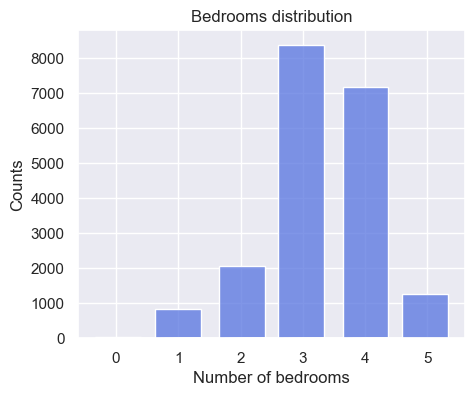

In [126]:
plot_bedrooms_hist()

### Price distribution

The next histograms describe the number of properties within a price range:

In [127]:
def plot_price_hist(kde: bool) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df["price"], log_scale=False, ax=axes[0], kde=kde, color=color_palette(10)[0])
    sns.histplot(df["price"], log_scale=True, ax=axes[1], kde=kde, color=color_palette(10)[0])
    fig.suptitle("Price distribution")
    axes[0].set(xlabel="Price of the properties ($)", ylabel="Counts")
    axes[1].set(xlabel="Price (log scale) of the properties ($)", ylabel="")
    plt.show()

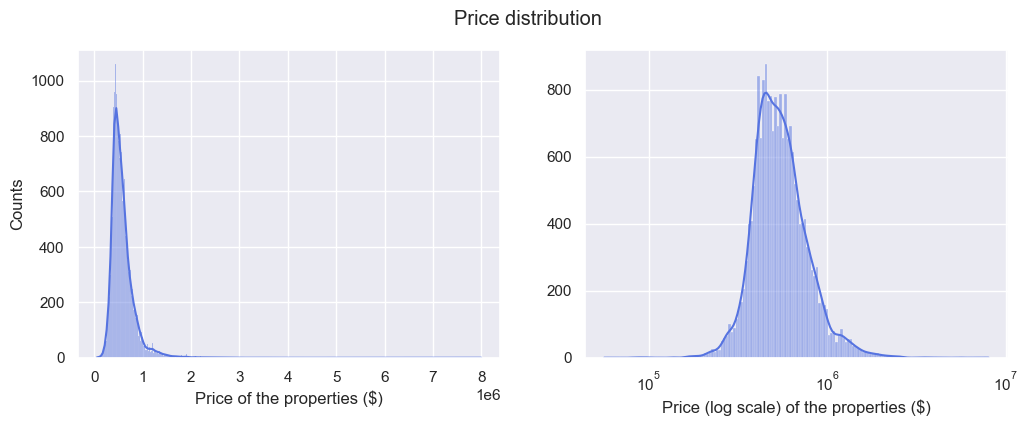

In [128]:
plot_price_hist(kde=True)

Skewness of the `price` variable:

In [129]:
# Skew computation
# Positive skew confirms the presence of outliers
df["price"].skew()

5.604641998053395

### Type distribution

The following table shows the absolute and relative count (also displayed in a graph) of houses and apartments:

In [130]:
# Type distribution
def type_dist(df: pd.DataFrame):
    type_counts = df["type"].value_counts()

    type_perc = type_counts / df.shape[0]
    type_counts_perc = pd.concat([type_counts, type_perc], axis=1)
    type_counts_perc.columns = ["Absolute count", "Relative count"]
    print("Type distribution:")
    display(type_counts_perc)

In [131]:
type_dist(df)

Type distribution:


,Absolute count,Relative count
house,17036,0.860578
unit,2760,0.139422


In [132]:
def counts_per_type(df: pd.DataFrame):
    counts = pd.DataFrame(df["type"].value_counts(normalize=True))
    counts.T.plot.bar(
        color=color_palette(6)[::5], 
        rot=0, 
        stacked=True,
        legend=True,
        width=.3,
        figsize=(6,4),
        xticks=[],
        ylabel="Percentage",
        title="Type distribution")
    
    plt.show()

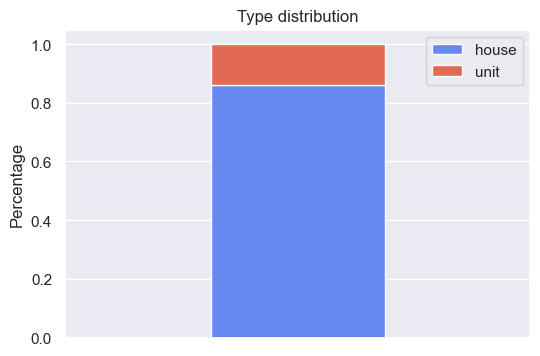

In [133]:
counts_per_type(df)

### Date distribution
[//]: # (-.- .tabset)

The following line graph shows the number of properties on sale per day:

In [218]:
# Date distribution
def counts_per_date(df: pd.DataFrame):
    date_counts = df["date"].value_counts()
    date_counts.sort_index().plot.line(
        figsize=(20,5), 
        color=color_palette(10)[0],
        ylabel="Counts",
        xlabel="Year",
        title="Date distribution"
        )
    print("Date distribution:")
    display(date_counts)
    plt.show()

Date distribution:


2018-11-14    33
2019-11-05    33
2018-11-07    33
2019-11-12    32
2018-09-19    32
              ..
2014-05-08     1
2014-04-02     1
2014-03-27     1
2014-03-12     1
2019-01-04     1
Name: date, Length: 2754, dtype: int64

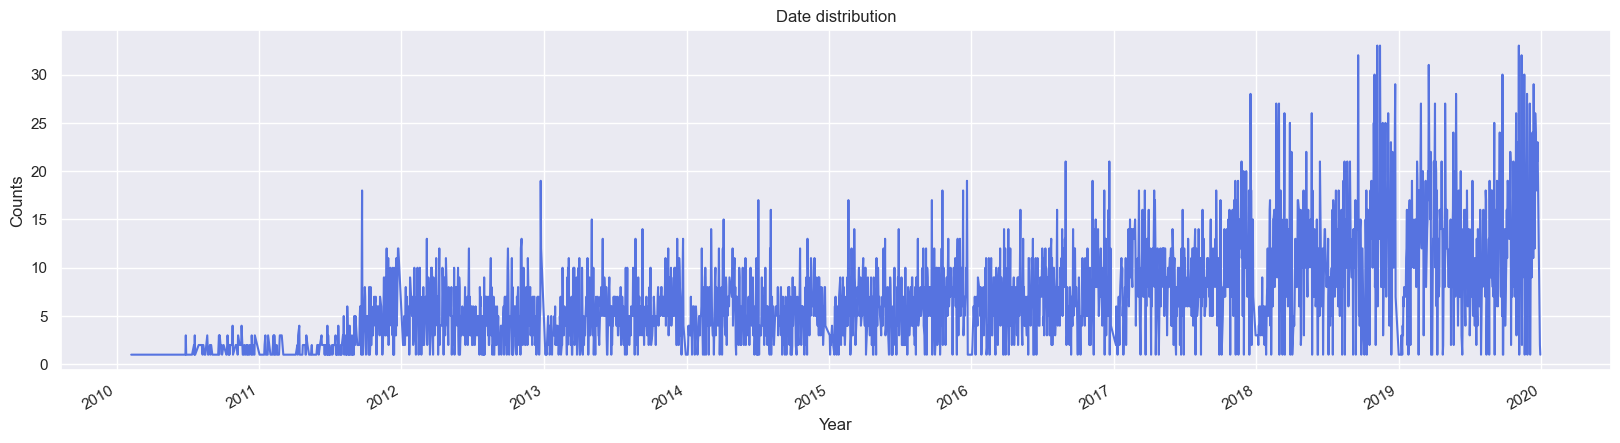

In [219]:
counts_per_date(df)

The following bar chart shows the number of properties sold per year:

In [228]:
def counts_per_year(df: pd.DataFrame):
    df["year"].value_counts().sort_index().plot.bar(rot=0, 
        title="Years distribution", 
        figsize=(7,4), 
        color=color_palette(10)[0], 
        ylabel="Counts",
        xlabel="Year")
    plt.show()

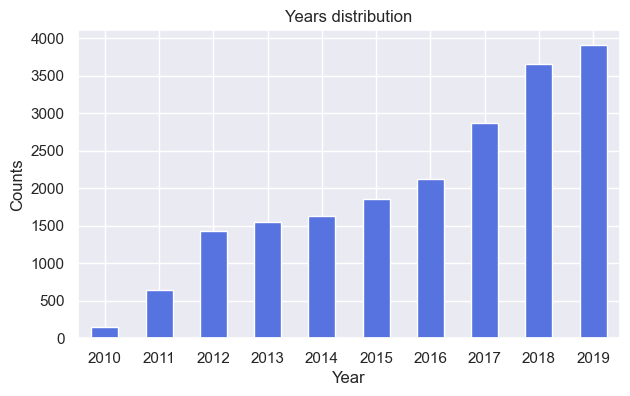

In [229]:
counts_per_year(df)

In addition, this bar chart shows the same distribution but considering the months:

In [230]:
def counts_per_month(df: pd.DataFrame):
    df["month"].value_counts().sort_index().plot.bar(
        rot=0, 
        # xticks=months,
        title="Months distribution", 
        figsize=(7,4), 
        color=color_palette(10)[0], 
        ylabel="Counts",
        xlabel="Month")
    plt.xticks(range(len(months)), months)
    plt.show()

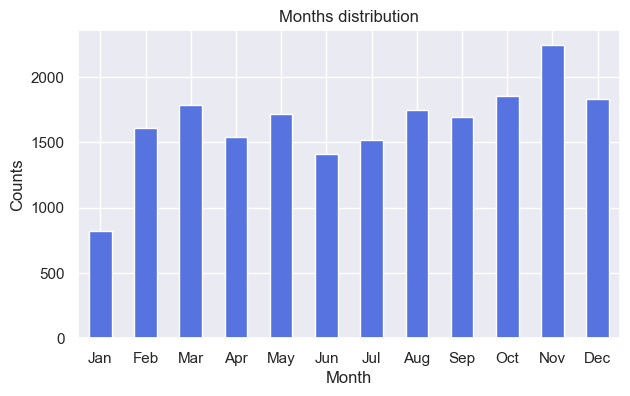

In [231]:
counts_per_month(df)

#### Counts per month

First, we are going to represent the comparison of absolute counts per month over years in a bar chart:

In [236]:
def abs_counts_months_years(df: pd.DataFrame):
    crosstab = pd.crosstab(df["month"], df["year"])
    crosstab.plot.bar(
        rot=0,
        figsize=(20, 5),
        width=0.9,
        xlabel="Month",
        ylabel="Counts",
        title="Properties sold per month over years",
        color=color_palette(10),
        legend=True,)
    plt.xticks(range(len(months)), months)
    plt.show()

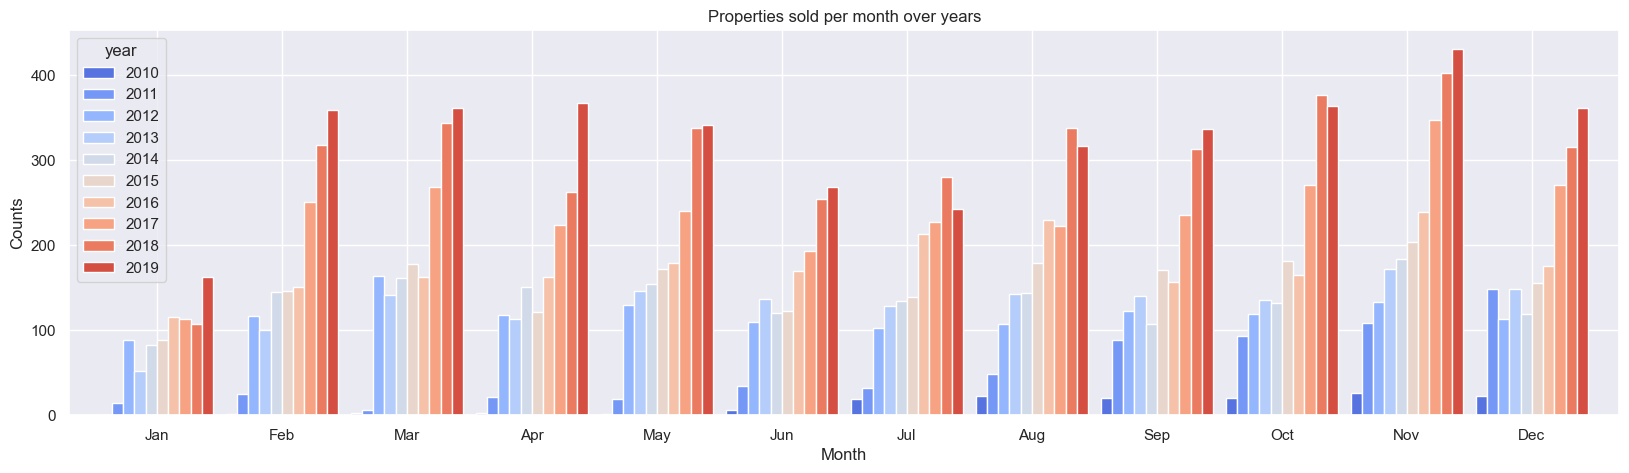

In [237]:
abs_counts_months_years(df)

In addition, we display the relative counts per month:

In [238]:
def rel_counts_months_years(df: pd.DataFrame):
    crosstab = pd.crosstab(df["month"], df["year"], normalize="index")
    crosstab.plot.barh(
        rot=0,
        stacked=True,
        figsize=(20, 5),
        width=0.9,
        ylabel="Month",
        xlabel="Percentage",
        title="Relative counts per month over years",
        color=color_palette(10),
        legend=True,)

    plt.yticks(range(len(months)), months)
    plt.show()

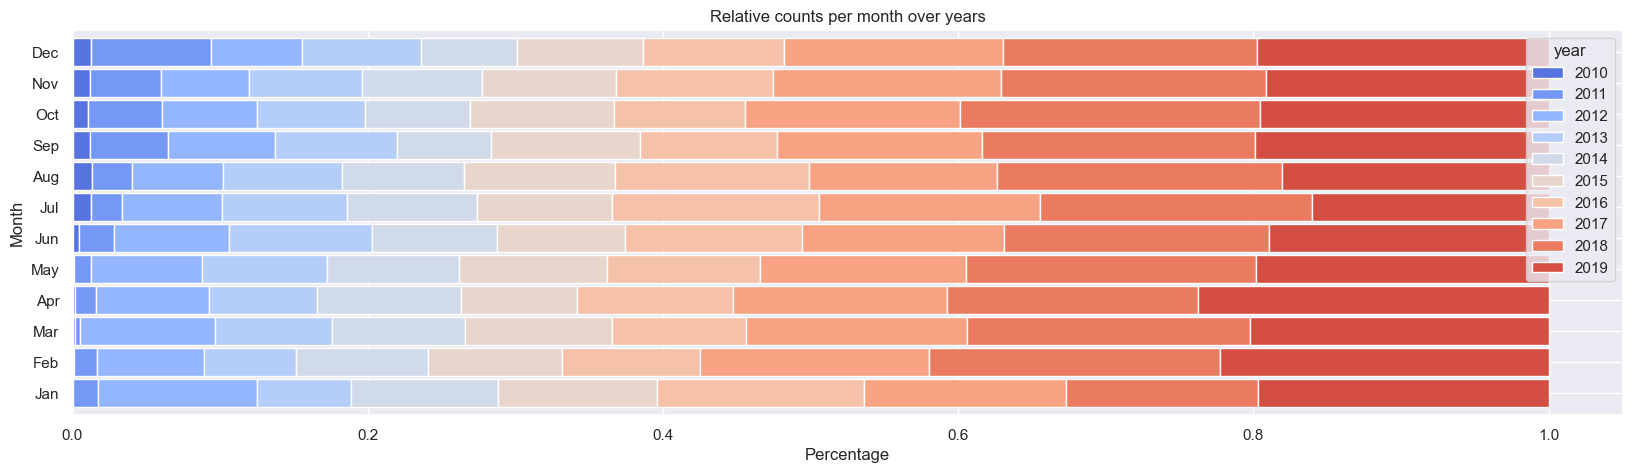

In [239]:
rel_counts_months_years(df)

#### Counts per year

Following the same idea as the counts per month, we represent the comparison of absolute counts per year over months in a barchart:

In [249]:
def abs_counts_years_months(df: pd.DataFrame):
    crosstab = pd.crosstab(df["year"], df["month"])
    crosstab.plot.bar(
        rot=0,
        figsize=(20, 5),
        width=0.9,
        xlabel="Year",
        ylabel="Counts",
        title="Properties sold per year over months",
        color=color_palette(12),
        legend=True)
    plt.legend(months)
    plt.show()

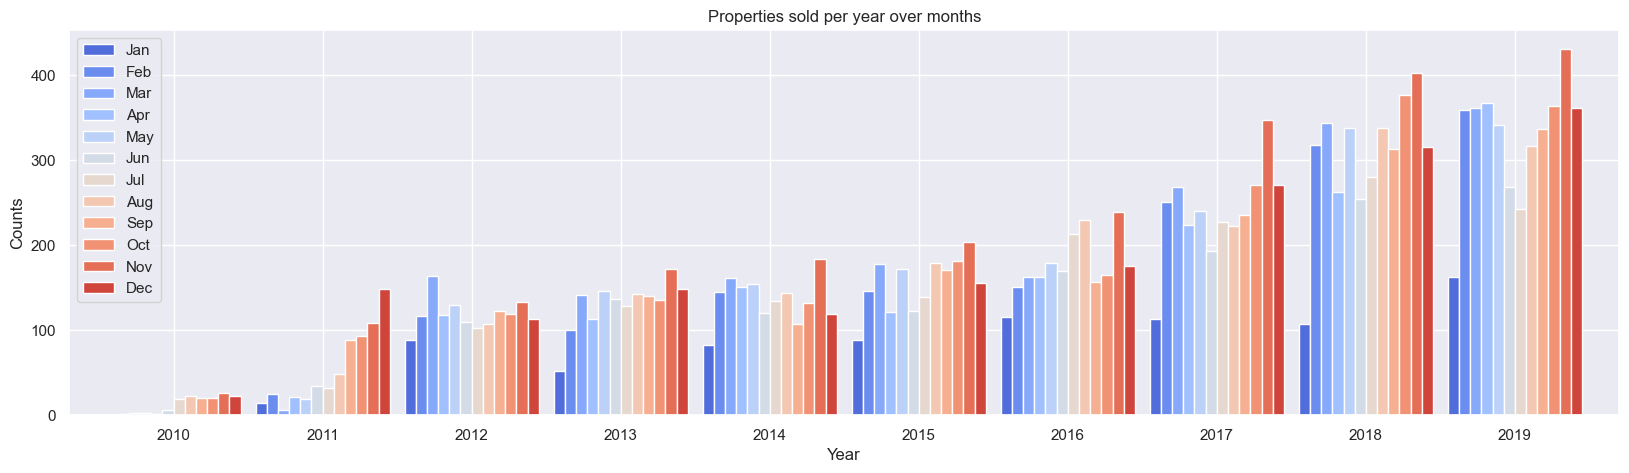

In [250]:
abs_counts_years_months(df)

In addition, we display the relative count per year:

In [244]:
def rel_counts_years_months(df: pd.DataFrame):
    crosstab = pd.crosstab(df["year"], df["month"], normalize="index")
    crosstab.plot.barh(
        rot=0,
        stacked=True,
        figsize=(20, 5),
        width=0.9,
        ylabel="Year",
        xlabel="Percentage",
        title="Relative counts per year over months",
        color=color_palette(12),
        legend=True,)
    plt.legend(months)
    plt.show()

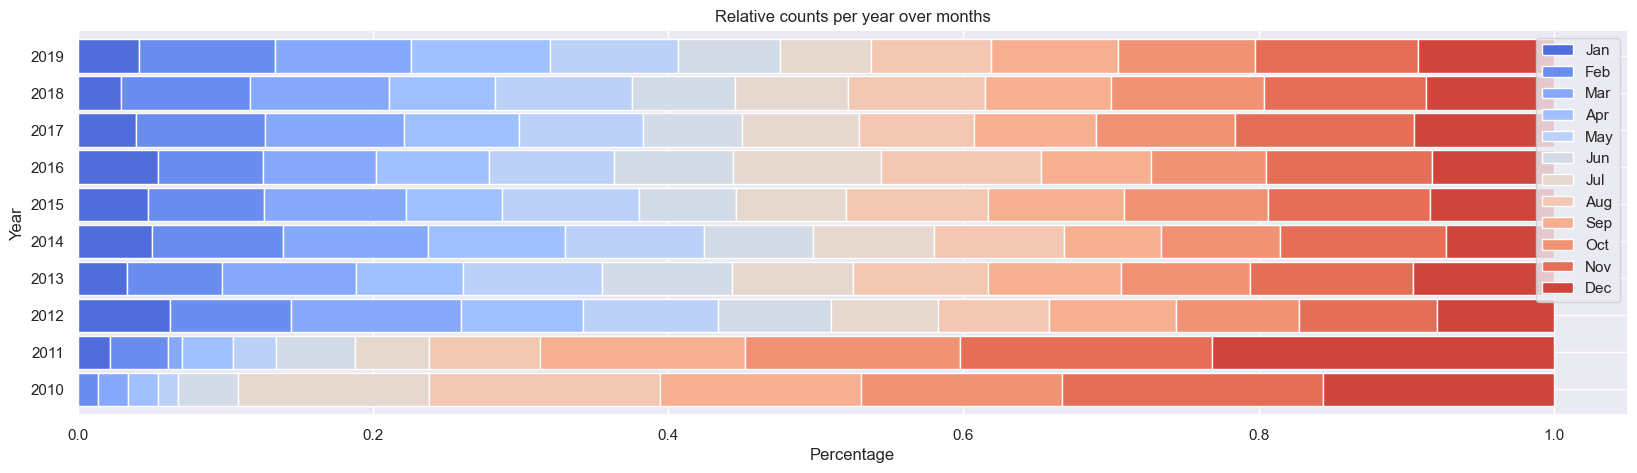

In [245]:
rel_counts_years_months(df)

## Exploring relationships

### Correlation matrix
[//]: # (-.- .tabset)

For the correlation analysis we represent the correlation matrix as a heatmap. We present three heatmaps of famous coefficients, but in the end we will rely on the *Spearman's* coefficient, as it is the best one for correlating continuous and ordinal values.

In [148]:
def heatmap(df: pd.DataFrame, method: str = "spearman"):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(df.corr(numeric_only=True, method=method), annot=True)
    method = method[0].upper() + method[1:]
    plt.suptitle(f"{method}'s correlation coefficient heatmap")
    plt.show()

#### Spearman

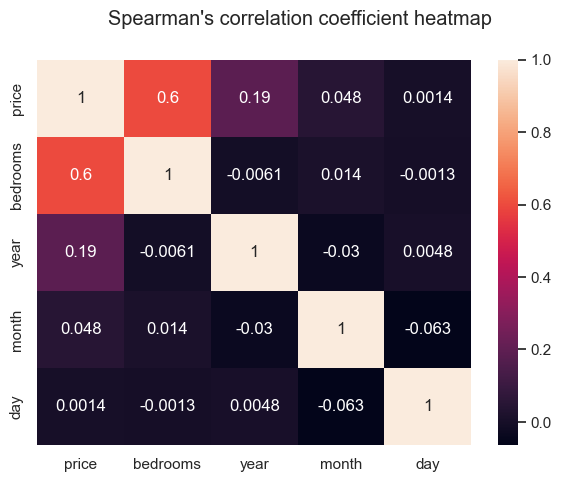

In [149]:
# Spearman method
heatmap(df, method="spearman")

#### Pearson

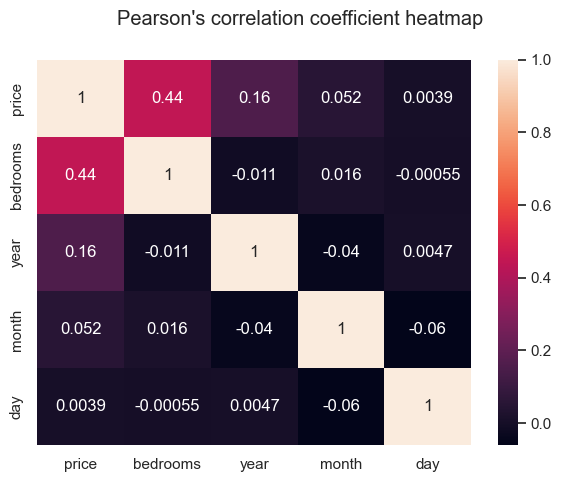

In [150]:
# Correlation matrix
heatmap(df, method="pearson")

#### Kendall's Tau

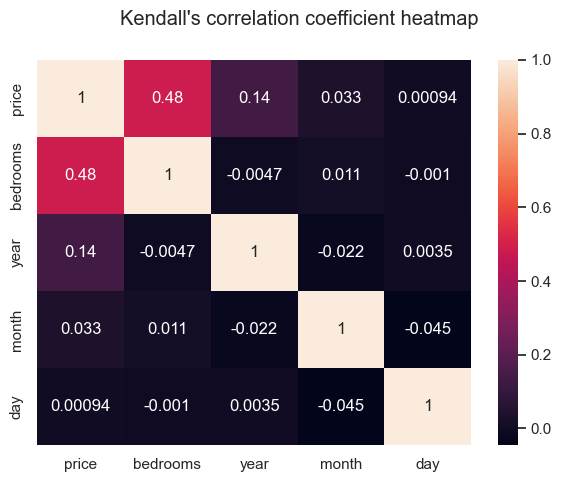

In [151]:
# Kendall's Tau method
heatmap(df, method="kendall")

### Price correlations
[//]: # (-.- .tabset)

In order to visualize the correlation of `price` with other variables we are using *boxplots*, as in this specific scenario they are better to visualize than scatter plots.

In [152]:
def scatter_price(df: pd.DataFrame, y_ax: str = "bedrooms"):
    ax = df.boxplot(
        column="price",
        by=y_ax,
        figsize=(15,5),        
    )
    ax.set_title("")
    ax.set_ylabel("price")
    ax.set_ylim(0, 2e6)
    plt.suptitle(f"Boxplot of price (capped at 2,000,000) and {y_ax}")
    plt.show()

#### Bedrooms

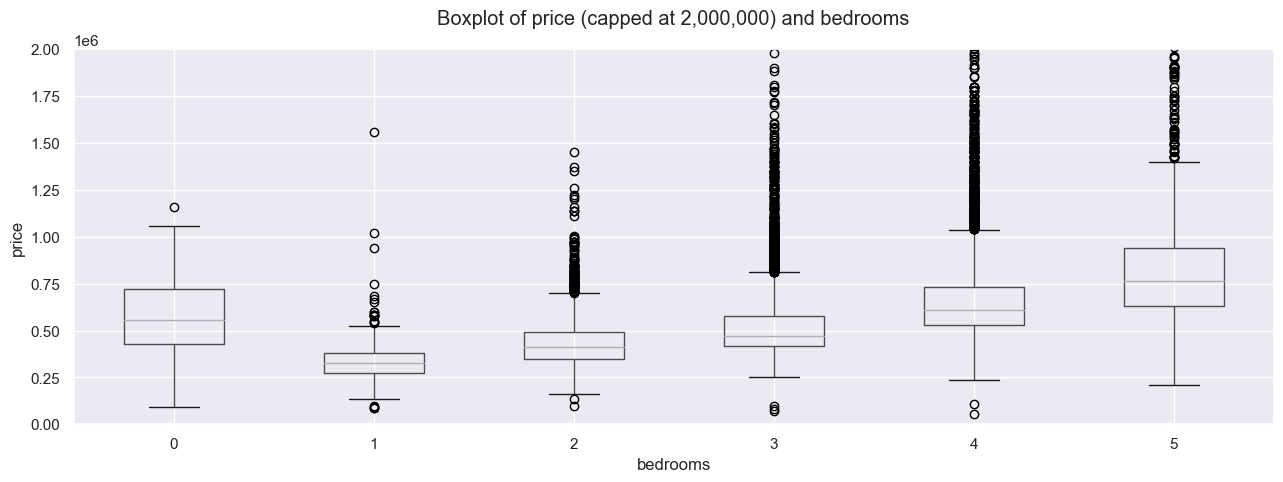

In [153]:
scatter_price(df, "bedrooms")

#### Year

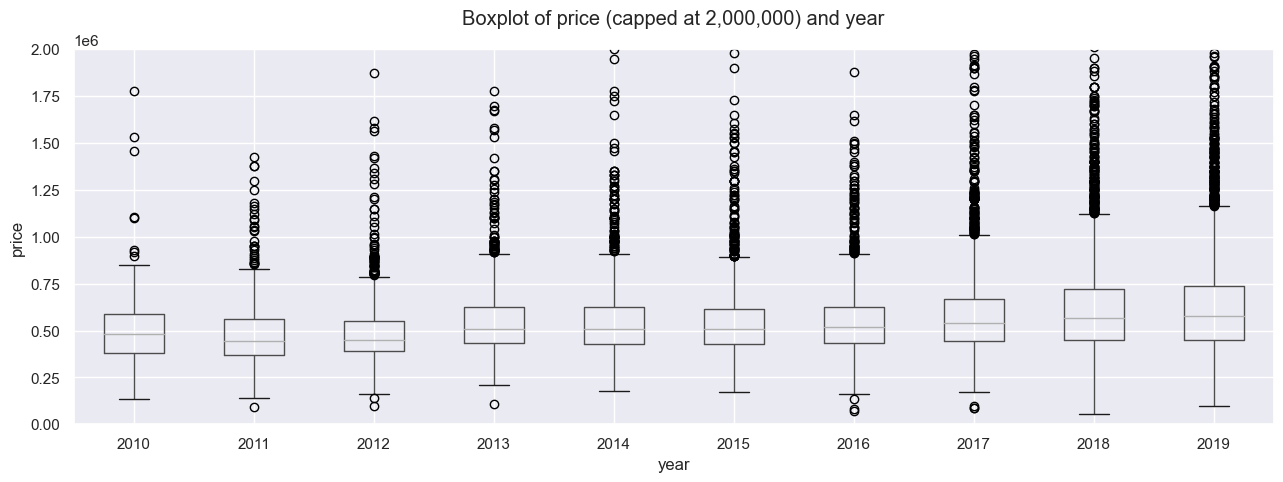

In [154]:
scatter_price(df, "year")

#### Month

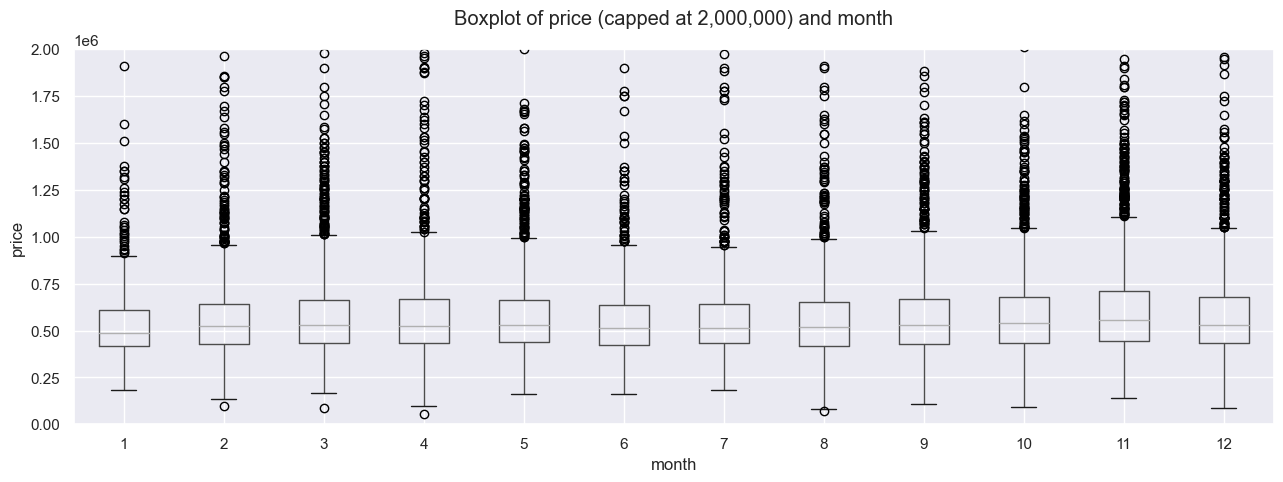

In [155]:
scatter_price(df, "month")

#### Day

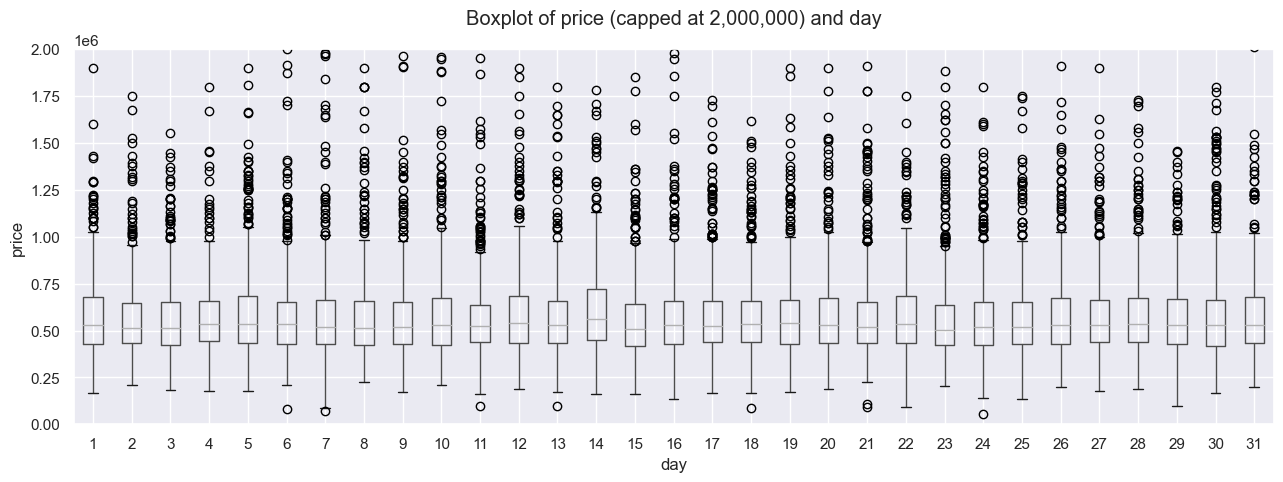

In [156]:
scatter_price(df, "day")

### Bedrooms per property type
[//]: # (-.- .tabset)

#### Absolute counts

First, we are going to represent the absolute counts of bedrooms per type of property:

In [253]:
# Bedrooms per property type
# Absolute counts
def abs_bedrooms_per_type(df: pd. DataFrame, print_table: bool = True):
    crosstab = pd.crosstab(df["bedrooms"], df["type"])
    crosstab.plot.bar(
        rot=0, 
        # subplots=
        figsize=(6, 3), 
        width=0.9, 
        xlabel="Bedrooms", 
        ylabel="Counts", 
        title="Bedrooms per property type", 
        color=color_palette(6)[::5],
        legend=True)
    if print_table:
        crosstab.index.name = None
        crosstab.columns.name = None
        display(crosstab)
    plt.show()

,house,unit
0,17,5
1,62,781
2,526,1546
3,7989,396
4,7166,29
5,1276,3


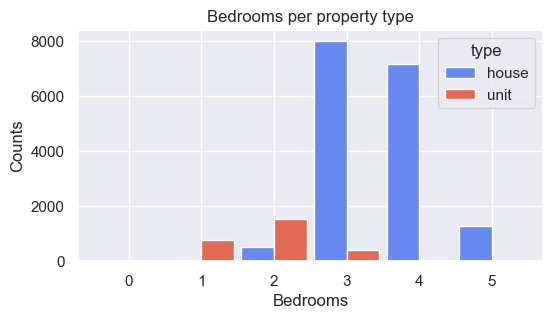

In [254]:
abs_bedrooms_per_type(df)

#### Relative counts

In addition, we display the relative counts of bedrooms per type of property:

In [268]:
# Relative counts
def rel_bedrooms_per_type(df: pd. DataFrame, print_table: bool = True):
    crosstab = pd.crosstab(df["type"], df["bedrooms"], normalize="index")
    crosstab.plot.bar(
        rot=0, 
        stacked=True,
        figsize=(6, 3), 
        width=0.9, 
        xlabel="Type", 
        ylabel="Percentage", 
        title="Bedrooms per property type (relative)", 
        color=color_palette(6),
        legend=True)
    if print_table:
        crosstab.index.name = None
        crosstab.columns.name = None
        display(crosstab.T)
    plt.show()

,house,unit
0,0.000998,0.001812
1,0.003639,0.282971
2,0.030876,0.560145
3,0.468948,0.143478
4,0.420639,0.010507
5,0.074900,0.001087


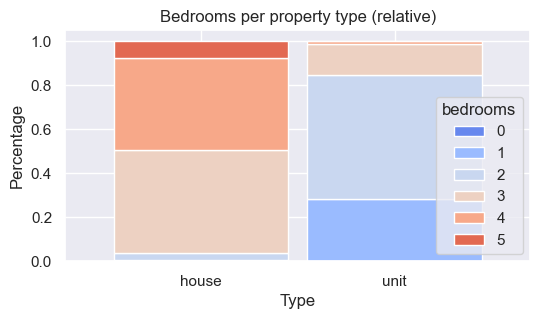

In [269]:
rel_bedrooms_per_type(df)

### Price per type

The following table shows the average price per type of property:

In [161]:
# Average prices per type of property
def avg_price_per_type(df: pd. DataFrame):
    df = df.groupby("type").agg({"price": ["mean", "median",  "std", "min", "max"]}).price
    for col in df:
        if type(df[col]) != str:
            df[col] = df[col].map('{:,.2f}'.format)
    df.index.name = None
    display(df)

In [162]:
avg_price_per_type(df)

,mean,median,std,min,max
house,"609,353.02","550,000.00","267,755.08","56,500.00","8,000,000.00"
unit,"426,348.30","395,000.00","171,696.54","85,000.00","2,500,000.00"


Let's plot the previous information considering 10 bins:

In [163]:
# Price per type of property (10 bins)
def price_per_type_10bins(df: pd. DataFrame):
    binned = pd.cut(df["price"], bins=10)
    crosstab = pd.crosstab(binned, df["type"])
    crosstab.plot.bar(
        rot=30,
        figsize=(12, 3), 
        width=0.9,
        ylabel="Counts (log-scaled)", 
        xlabel="Price (10 bins)",
        title="Price per property type, 10 bins, log-scaled", 
        legend=True,
        color=color_palette(6)[::5], 
        logy=True)
    plt.show()

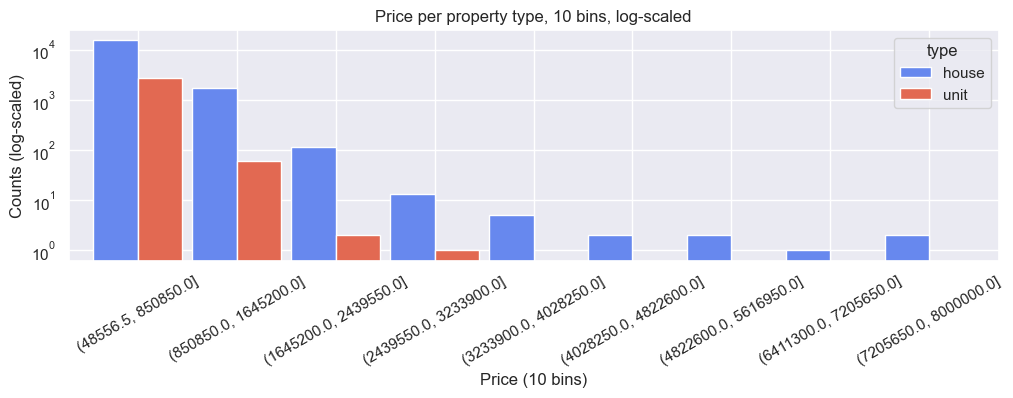

In [164]:
price_per_type_10bins(df)

Now, with the same information, let's plot the graph considering 100 bins:

In [165]:
# Price per type of property (100 bins)
def price_per_type_100bins(df: pd. DataFrame):
    binned = pd.cut(df["price"], bins=100)
    crosstab = pd.crosstab(binned, df["type"])
    crosstab[:20].plot.bar(
        figsize=(12, 3), 
        width=0.9, 
        xlabel="Price", 
        ylabel="Counts", 
        title="Price per type, 100 bins, first 20 bins", 
        color=color_palette(6)[::5],
        legend=True)
    plt.show()

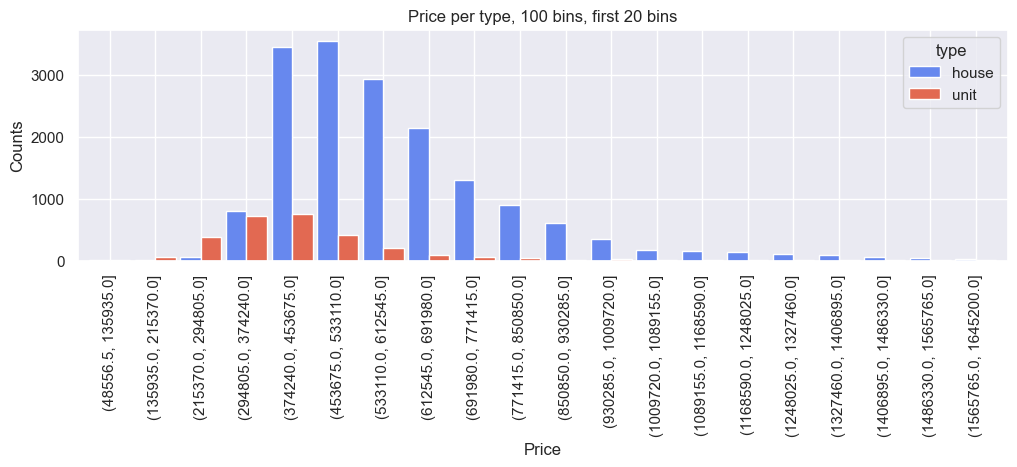

In [166]:
price_per_type_100bins(df)

### Price per number of bedrooms

The following barplot shows the average price per number of bedrooms considering 10 bins: 

In [167]:
# Price per bedrooms (10 bins)
def price_per_bedrooms(df: pd. DataFrame):
    binned = pd.cut(df["price"], bins=10)
    crosstab = pd.crosstab(binned, df["bedrooms"])
    crosstab.plot.bar(
        rot=30,
        figsize=(12, 3),
        width=0.9,
        xlabel="Price",
        ylabel="Counts",
        title="Price per bedrooms, 10 bins, log-scaled",
        color=color_palette(6),
        legend=True,
        logy=True)
    plt.show()

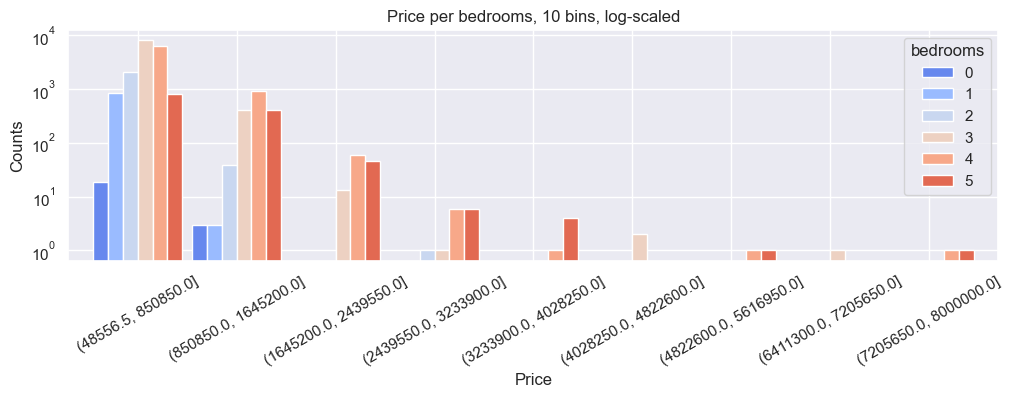

In [168]:
price_per_bedrooms(df)

### Price per no. of bedrooms over the years

The following line chart describes the average price per number of bedrooms over the years: 

In [255]:
# Price per bedrooms per year
def price_per_bedrooms_per_years(df: pd. DataFrame):
    
    df = df.groupby(['year', 'bedrooms'])["price"].mean()
    df = df.to_frame()
    df.reset_index(inplace=True)
    sns.set(rc={'figure.figsize':(20,5)})
    p = sns.lineplot(
        x="year", 
        y="price", 
        hue="bedrooms", 
        data=df, 
        palette=color_palette(6))
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per year")
    plt.xlabel("Year")
    plt.ylabel("Average price")
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

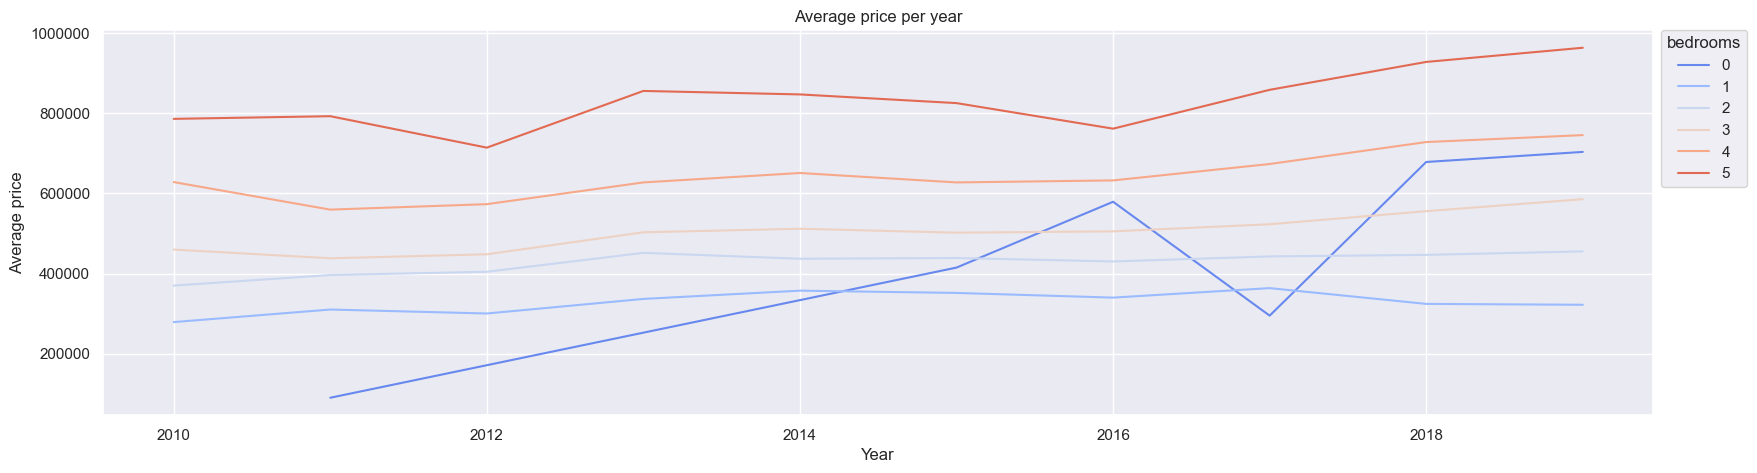

In [256]:
price_per_bedrooms_per_years(df)

### Price per year
[//]: # (-.- .tabset)

The following line chart describes the average price along the years. We must take into account that the average is mostly influenced by the houses price since there are more collected data from houses than from apartments and they are considerably more expensive.  

In [171]:
# Price per year
def price_per_year(df: pd. DataFrame):
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="year", 
        y="price", 
        data=df, 
        color=color_palette(6)[0])
    plt.title("Average price per year")
    plt.xlabel("Year")
    plt.ylabel("Average price")
    plt.show()

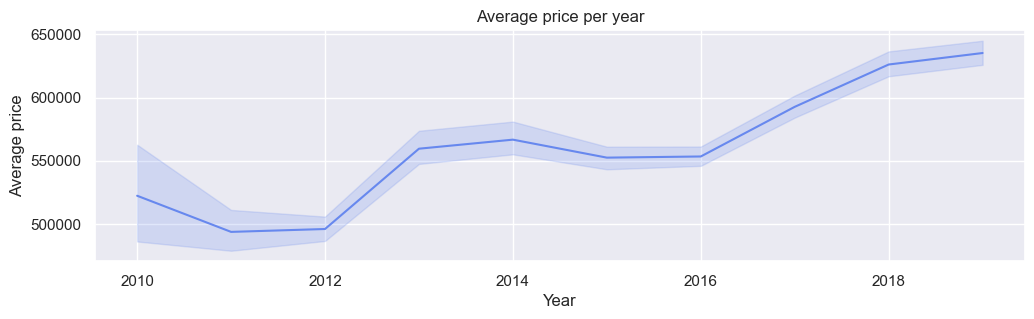

In [172]:
price_per_year(df)

#### Per type

The following line chart describes the average price per property type along the years: 

In [257]:
# Price per year per type
def price_per_type_per_year(df: pd. DataFrame):
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="year", 
        y="price", 
        hue="type", 
        data=df, 
        palette=color_palette(6)[::5])
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per year")
    plt.xlabel("Year")
    plt.ylabel("Average price")
    plt.show()

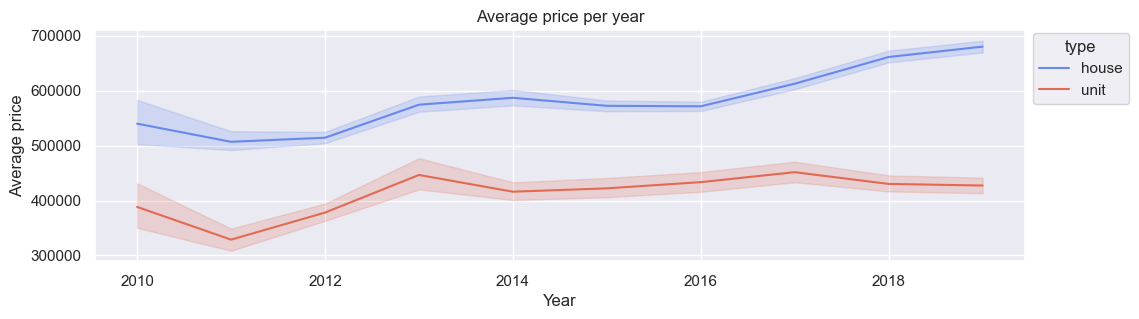

In [258]:

price_per_type_per_year(df)

#### Houses

The following line chart describes the average price of houses along the years: 

In [175]:
# Price per year, houses
def price_per_year_houses(df: pd. DataFrame):
    df = df[df["type"] == "house"]
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="year", 
        y="price", 
        data=df, 
        color=color_palette(6)[0])
    plt.title("Houses average price per year")
    plt.xlabel("Year")
    plt.ylabel("Average price")
    plt.show()

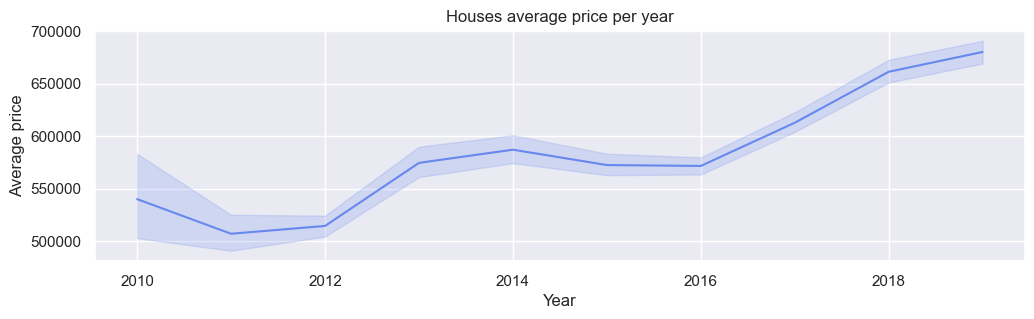

In [176]:
price_per_year_houses(df)

#### Apartments

The following line chart describes the average price of apartments along the years: 

In [177]:
# Price per year, units
def price_per_year_units(df: pd. DataFrame):
    df = df[df["type"] == "unit"]
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="year", 
        y="price", 
        data=df, 
        color=color_palette(6)[5])
    plt.title("Units average price per year")
    plt.xlabel("Year")
    plt.ylabel("Average price")
    plt.show()

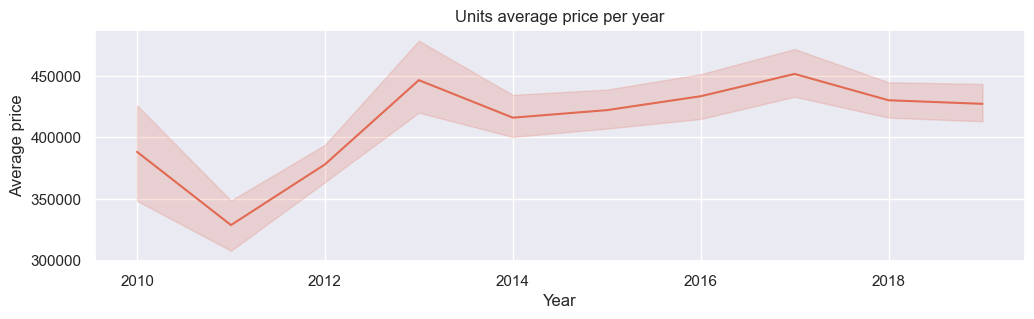

In [178]:
price_per_year_units(df)

### Price per month
[//]: # (-.- .tabset)

The following line chart describes the average price per month. We must take into account that the average is mostly influenced by the houses price since there are more collected data from houses than from apartments and they are considerably more expensive.  

In [179]:
# Price per month
def price_per_month(df: pd. DataFrame):
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        data=df, 
        color=color_palette(6)[0])
    plt.title("Average price per month")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

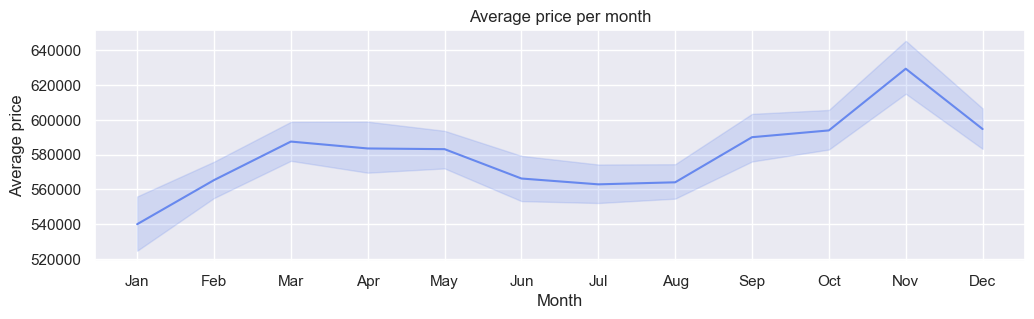

In [180]:
price_per_month(df)
plt.show()

#### Per type

The following line chart describes the average price per property type per months of the year: 

In [259]:
# Price per month per type
def price_per_type_per_month(df: pd. DataFrame):
    sns.set(rc={'figure.figsize':(20,5)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        hue="type", 
        data=df, 
        palette=color_palette(6)[::5])
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per month")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

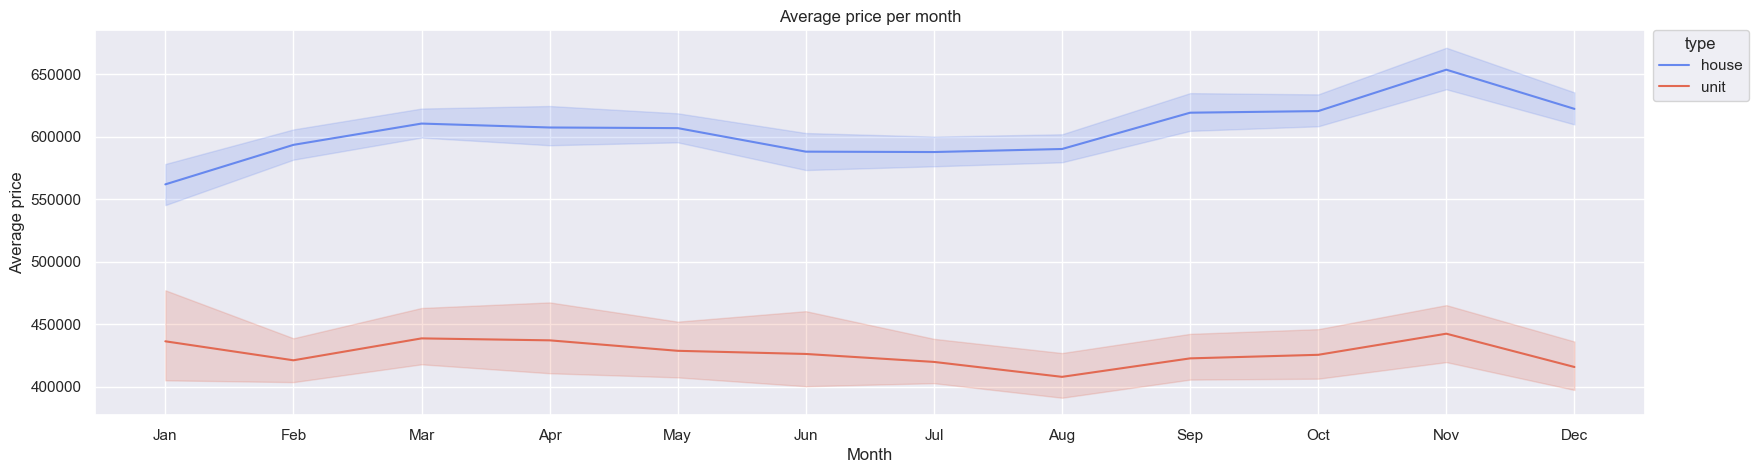

In [260]:
price_per_type_per_month(df)

#### Houses

The following line chart describes the average price of houses per month of the year: 

In [183]:
# Price per month, houses
def price_per_month_houses(df: pd. DataFrame):
    df = df[df["type"] == "house"]
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        data=df, 
        color=color_palette(6)[0])
    plt.title("Houses average price per month")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

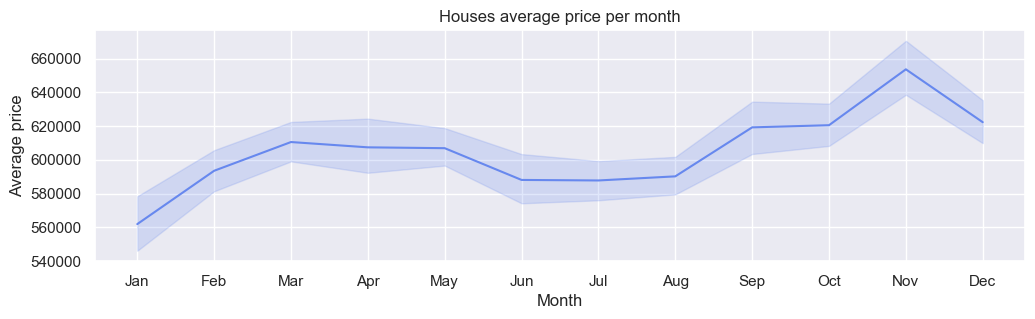

In [184]:
price_per_month_houses(df)

#### Apartments

The following line chart describes the average price of apartments per month of the year: 

In [261]:
# Price per month, units
def price_per_month_units(df: pd. DataFrame):
    df = df[df["type"] == "unit"]
    sns.set(rc={'figure.figsize':(12, 3)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        data=df, 
        color=color_palette(6)[5])
    plt.title("Units average price per month")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

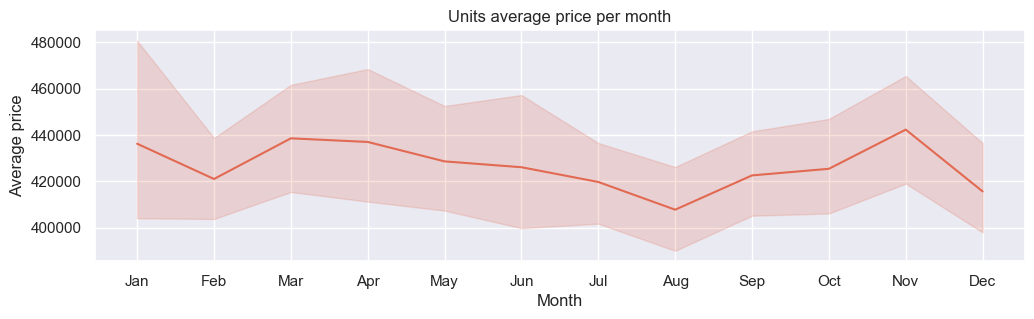

In [262]:
price_per_month_units(df)

### Price per month per year
[//]: # (-.- .tabset)

The following line chart compares the average price from the different years per month:

In [187]:
# Average price per month per year
def price_per_month_per_year(df: pd.DataFrame):
    df = df.groupby(['month', 'year'])["price"].mean()
    df = df.to_frame()
    df.reset_index(inplace=True)
    sns.set(rc={'figure.figsize':(20,5)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        hue="year", 
        data=df, 
        palette=color_palette(10))
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per month")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

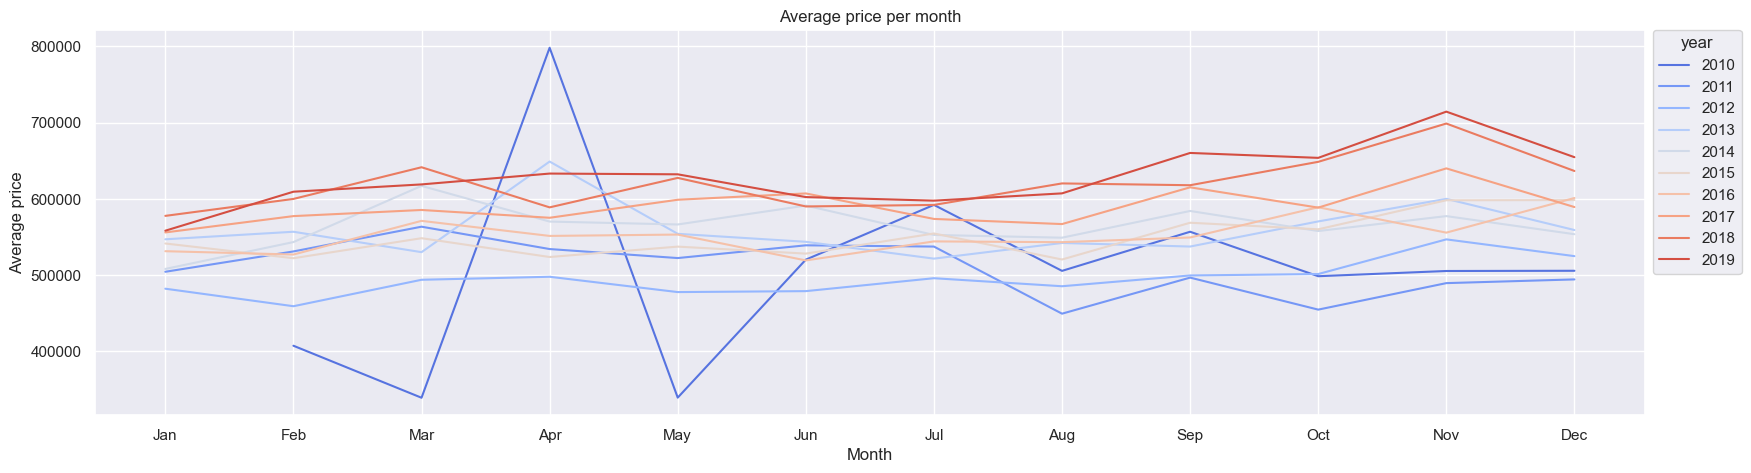

In [188]:
price_per_month_per_year(df)

#### Houses

The following line chart compares the average price of houses from the different years per month:

In [189]:
# Average price of houses per month per year
def price_per_month_per_year_house(df: pd.DataFrame):
    df = df.query("type == 'house'").groupby(['month', 'year'])["price"].mean()
    df = df.to_frame()
    df.reset_index(inplace=True)
    sns.set(rc={'figure.figsize':(20,5)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        hue="year", 
        data=df, 
        palette=color_palette(10))
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per month (houses)")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

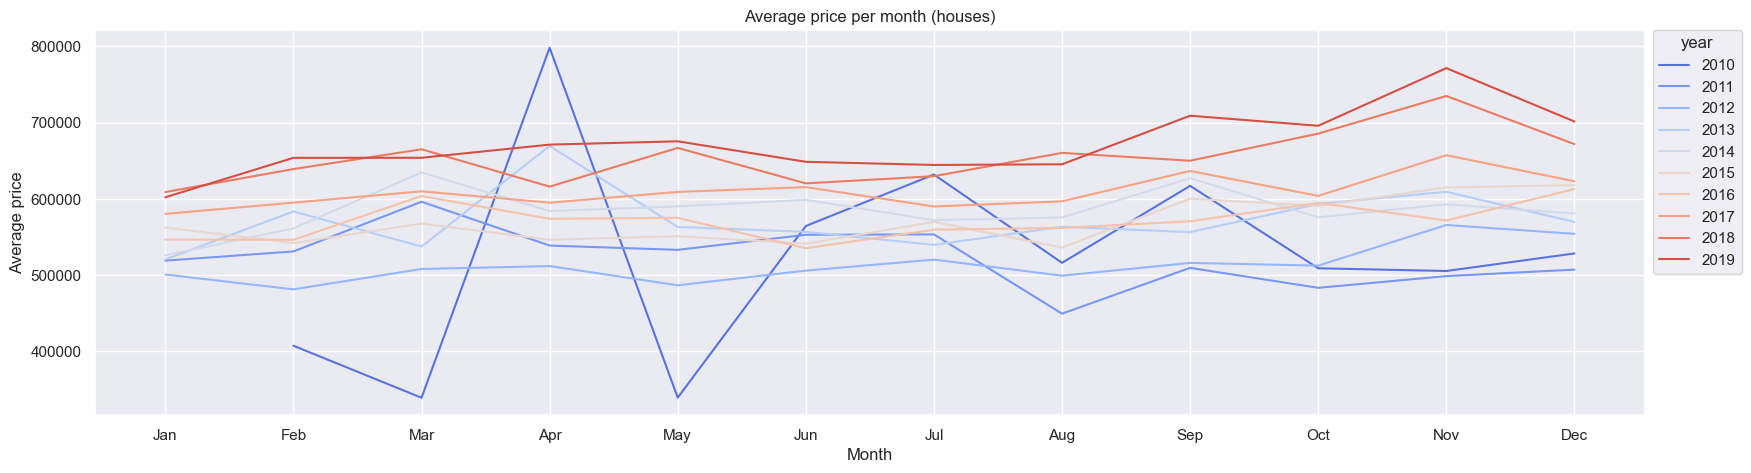

In [190]:
price_per_month_per_year_house(df)

#### Apartments

The following line chart compares the average price of apartments from the different years per month:

In [191]:
# Average price of apartments per month per year
def price_per_month_per_year_unit(df: pd.DataFrame):
    df = df.query("type == 'unit'").groupby(['month', 'year'])["price"].mean()
    df = df.to_frame()
    df.reset_index(inplace=True)
    sns.set(rc={'figure.figsize':(20,5)})
    p = sns.lineplot(
        x="month", 
        y="price", 
        hue="year", 
        data=df, 
        palette=color_palette(10))
    sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.title("Average price per month (apartments)")
    plt.xlabel("Month")
    plt.ylabel("Average price")
    plt.xticks(range(1, len(months) + 1), months)
    plt.show()

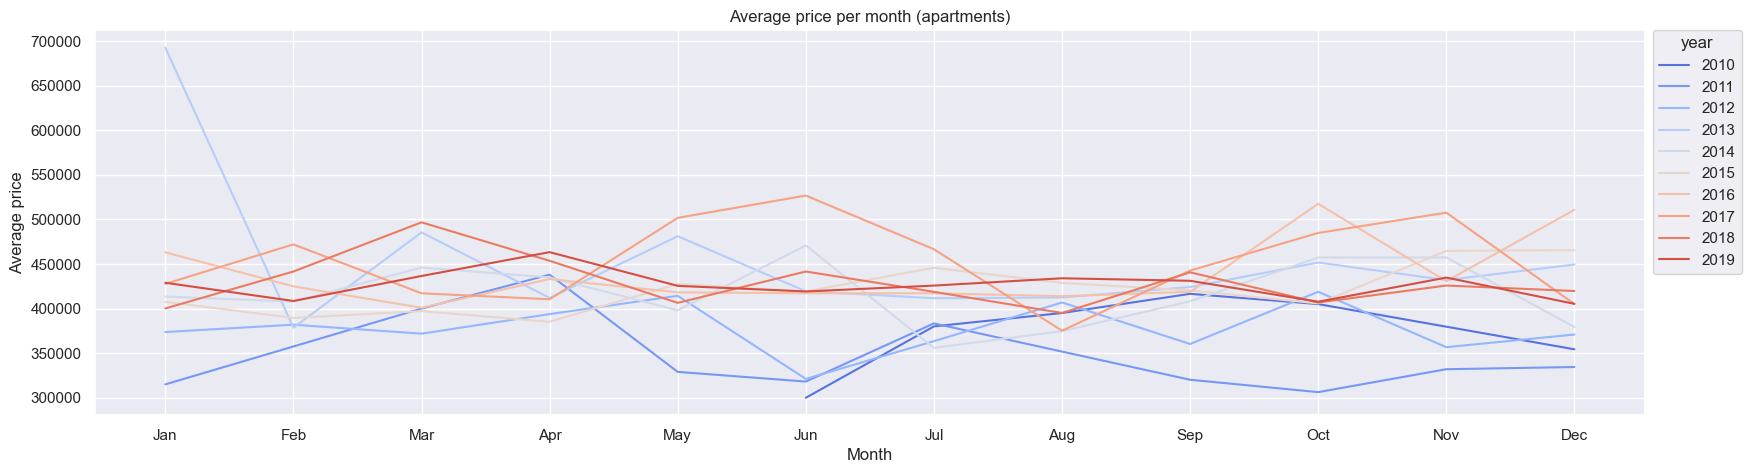

In [192]:
price_per_month_per_year_unit(df)

### Price outliers

The following boxplot shows the price outliers per year:

In [193]:
# Vizualization of price outliers
def price_outliers_per_year(df: pd.DataFrame):
    df.boxplot(column="price", by="year", rot=0, figsize=(12,8))
    plt.title("Basic statistics vizualization for price per year")
    # plt.figure(figsize=(5, 10))
    plt.suptitle('')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.yscale
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

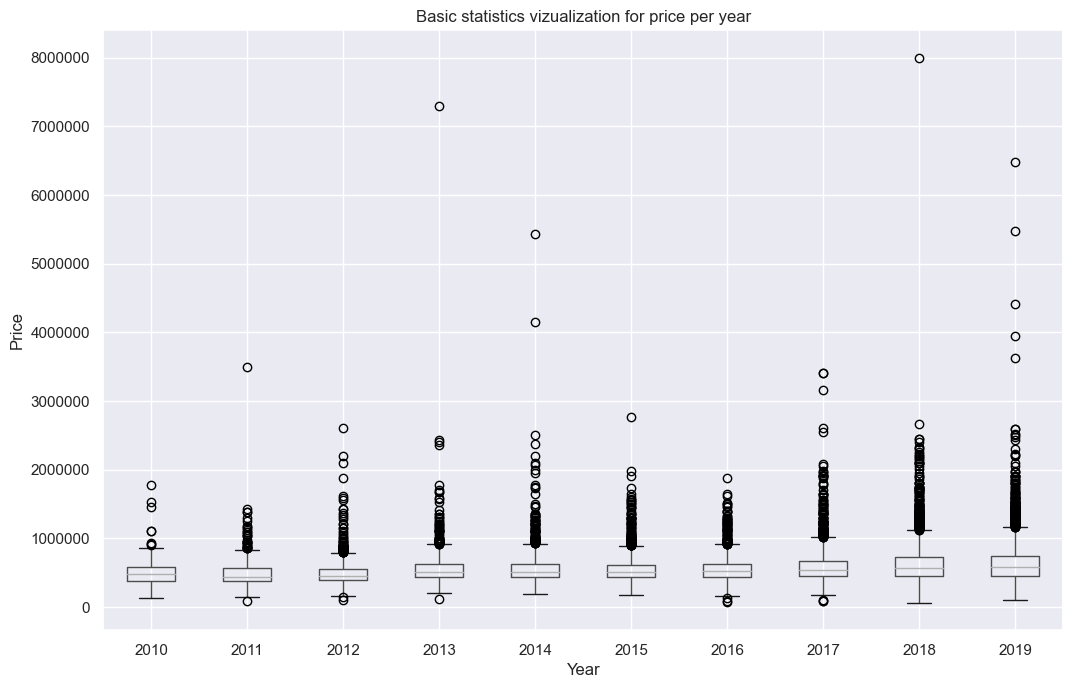

In [194]:
price_outliers_per_year(df)

Similarly, the following boxplot shows the price outliers per property type:

In [263]:
# Vizualization of price outliers
def price_outliers_per_type(df: pd.DataFrame):
    df.boxplot(column="price", by="type", rot=0, figsize=(6,6))
    plt.title("Basic statistics vizualization for price per type")
    # plt.figure(figsize=(5, 10))
    plt.suptitle('')
    plt.xlabel("Property type")
    plt.ylabel("Price")
    plt.yscale
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

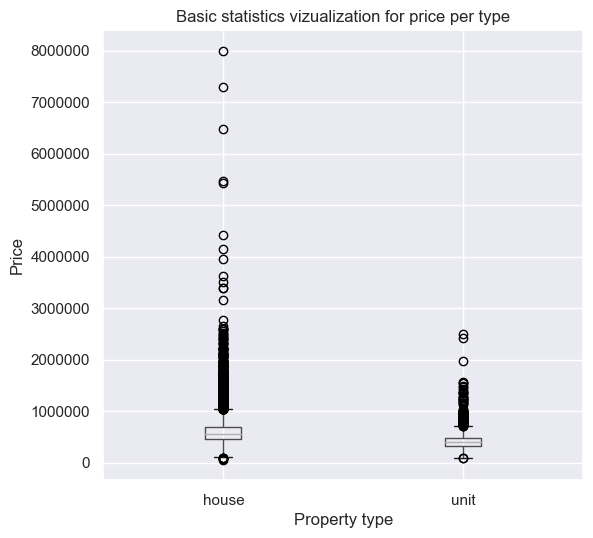

In [264]:
price_outliers_per_type(df)

# Answers

In this section we are answering to the assignment questions. For each question, we will be only showing those plots that are the most relevant for that question, but every statement has a proper motivation that can be found in the [detailed analysis](#detailed-analysis); hence, if something is not clear from this answers, it is possible to look up for it in the [detailed analysis](#detailed-analysis)

*N.B.*: each unique plot is generated by a function. All the functions are defined inside the [detailed analysis section](#detailed-analysis); therefore, if one runs only the code cells inside this section, they will not work. We hence recommend to run all the cells of the notebook.

## Question 1

### 1-A
> Make sure all columns have the correct data type, e.g., ‘float’ or ‘int’ for numeric quantities, ‘object’ for categorical variables, ‘datetime’ for dates, etc

The following cell loads the dataset in a Pandas DataFrame from the `.csv` file, ensuring that:
* the `date` column is correctly parsed as a `datetime` object
* each numerical value is assigned to the correct and smallest capacity encoding format, allowing to reduce memory consumption by 25% 

```python
types = {
    "price": np.uint32,
    "type": str,
    "bedrooms": np.uint8
}

df = pd.read_csv(DS_PATH, dtype=types, parse_dates=["date"])
```

We can check the data types with the command `df.dtypes`

In [197]:
display(df_types_raw)

date        datetime64[ns]
price               uint32
type                object
bedrooms             uint8
dtype: object

To make the subsequent data analysis more convenient, we parsed the `date` column so that the `year`, `month`, and `day` individual values are separated.

In [198]:
display(df.dtypes)

date        datetime64[ns]
price               uint32
type                object
bedrooms             uint8
year                uint16
month                uint8
day                  uint8
dtype: object

### 1-B
> Describe the basic statistics (mean, minimum, maximum, standard deviation, etc.) of the numerical variables

The **following table** describes the basic statistics of the numerical variables of the dataset (that is, price and bedrooms).

In [199]:
describe(df)

Numerical columns (price and bedrooms) distribution:


,price,bedrooms
min,5.650000e+04,0.000000
max,8.000000e+06,5.000000
mean,5.838381e+05,3.299505
std,2.642425e+05,0.904012
25%,4.310000e+05,3.000000
50%,5.270000e+05,3.000000
75%,6.600000e+05,4.000000


**Price.** In the `price` column we can see that the minimum price is 56,000 and the maximum is 8,000,000, with a mean of around 580,000  and a standard deviation of 260,000. These values, coupled with the percentiles values (which indicate that properties within the 75% are under 660,000), are first indicators of the presence of many price outliers, meaning that we are expecting to find many properties that are far more expensive that the vast majority of properties.

Indeed, if we take a look at the `price` distribution, we can see that prices appear to be normally distributed, but the distribution is rather positively skewed, since the counts are mostly to be found on the leftmost part.

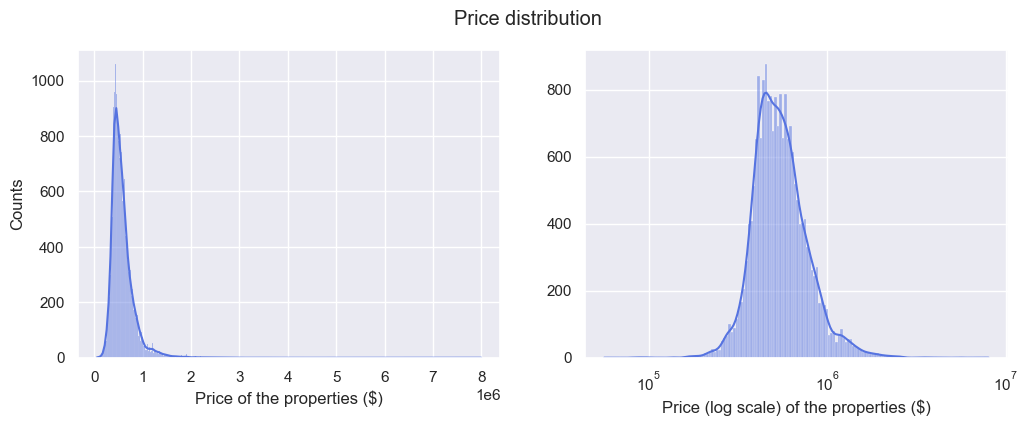

In [272]:
plot_price_hist(kde=True)

**Bedrooms.** For what concerns the `bedroom` column, we can observe that the mean is a little over *3* with a std of *0.9*, that means that we expect the most common number of bedrooms to be *3* and *4*, but 3 should be the dominant value, as is the value of both the 25% and 50% percentile. 

This is confirmed by the following histogram, representing the distribution.

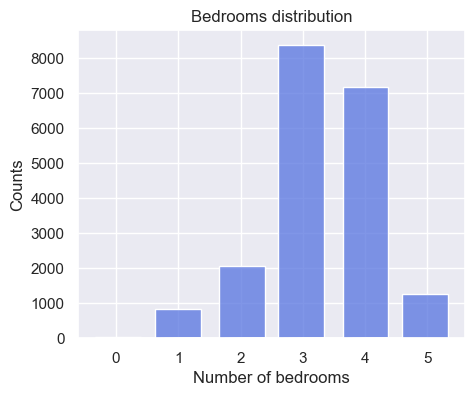

In [273]:
plot_bedrooms_hist()


We can also see that the maximum value of bedrooms in this dataset is **5**, while the minimum is **0**. This may either indicate that 
1. entries with 0 bedrooms have a missing value
2. or that those properties are specific types of structures that are not supposed to have bedrooms (like for instance studio apartments, bungalows, studios, and so on)

Since we have no outside knowledge of how this data was collected and, possibly, pre-processed, we will assume that the second hypothesis is correct throughout this analysis; that means that we will not operate further processing on the bedrooms column, so we *will not* remove properties with 0 bedrooms.

## Question 2

### 2-A
> Is the dataset balanced in terms of the type of properties? As a rule of thumb, a ratio of 80:20 can be considered an imbalance. 

For what concerns the distribution of types of properties, the dataset is significantly **imbalanced**:
* *houses* represent almost *87%* of the entries
* *units* samples are barely over *13%*

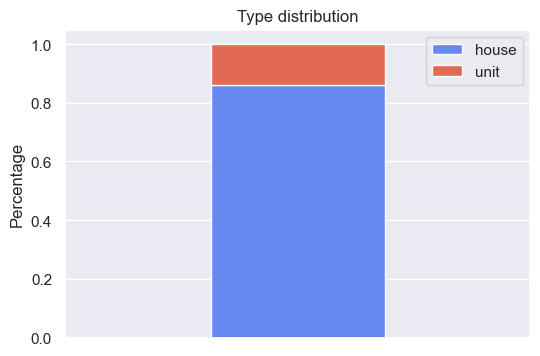

In [200]:
counts_per_type(df)

> If you would need to correct this imbalance for the prediction task, how would you do it?

We can classify the techniques for dealing with imbalance according to what stage they are performed. 

**Pre-processing stage.** The first set of approaches is performed at the pre-processing stage and therefore aims to create a fresh, balanced dataset $\mathcal{D'}$ out of the starting one $\mathcal{D}$. This can be achieved in several ways:

* *undersampling*: we sample from the majority class (*houses*) to keep only a part of these points
* *oversampling*: we duplicate some points from the minority class (*units*) to increase its cardinality
* *synthetic data generation*: we create fresh, synthetic points to augment the minority class

Although all these techniques allow us to obtain a balanced dataset, they do not come without shortcomings or *caveats*. 

Both undersampling and oversampling, in fact, require to set the magnitude of the resampling. In we undersample `houses` so that $|houses| = |units|$ we have a severe information loss in $\mathcal{D'}$; we could aim to find a good trade-off between undersampling rate and information preservation, i.e. find a good ratio $\lambda$ between the cardinality of `houses` and `units` ($|houses| = \lambda|units|$), but finding such good value that the model performances are maximized is not trivial (meta-learning techniques can help in this regard).

Moreover, if our `units` samples are not representative, oversampling might just propagate biases in the freshly balanced dataset since we are just duplicating values.

Ultimately, generating synthetic data does come with a similar issue as oversampling, as we would generate new data based on the distribution inferred from the available `unit` samples; if this distribution is not similar enough to the real distribution of the data, the synthetic samples will also propagate biases, thus interfering with the prediction task itself.

There is one more important technique worth mentioning. One of the main issues we may encounter with an imbalanced dataset is that the cross-validation splits may further increase the imbalance, with the extreme consequences being that we may end up with a training split with very few or no samples of type `unit`. For this matter, it is advisable to perform a **stratified sampling** on the type of properties when splitting the dataset.

**Training stage.** The techniques from this set can be applied several times during the training stage of the model and are especially useful if we are employing a DNN model. They all aim to reduce the bias introduced in the model by the imbalanced training data:

* at batch data loading time, we can ensure that each batch draws a fixed quote of samples for each type of property, i.e. each batch has a minimum percentage of samples from the minority class (`units`). This ensures a *local balance*  of the training batches and acts similarly to undersampling, hence suffering from the same disadvantages (i.e. information loss and bias propagation)
* we can design the loss function of the model such that `units` samples have bigger weights at loss computation time
* we can use norm regularization techniques, such for example L2 regularization, to penalize large weights and therefore mitigate the bias introduced in the model by the imbalanced training data, improving generalization.

**Collect more data.** As a last remark, it is worth mentioning that one could also enlarge the dataset by adding comparably similar or more of the same data to the set, which might be collected at another location (country, region, city) or the original one. This could generate a more robust dataset, which inherits a broader (or rather a generalized) representation of the real world. Nevertheless, we will assume that the data set at hand is complete, and not knowing any further information about the gathering process and the related characteristics of the data this option would not prove to be viable.

### 2-B
> What is the distribution of the property prices per type of property? According to this data, are houses generally cheaper or more expensive than apartments?

In general, houses are more expensive than apartments. The first evidence of this can be seen from the basic statistics, where we can see that the mean price of houses is over 600,000, while the units mean price is around 425,000:

In [201]:
avg_price_per_type(df)

,mean,median,std,min,max
house,"609,353.02","550,000.00","267,755.08","56,500.00","8,000,000.00"
unit,"426,348.30","395,000.00","171,696.54","85,000.00","2,500,000.00"


This can be seen if we take a look at the distribution of the prices per type of property: in particular, we can see that in the rightmost part of the histogram, only houses are to be found, suggesting that expensive houses are much more frequent - and more expensive - than expensive units. 


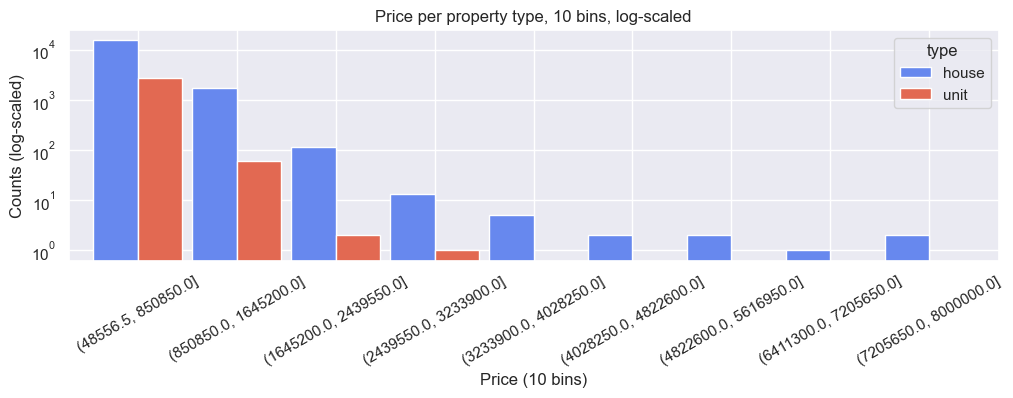

In [202]:
price_per_type_10bins(df)

Indeed, if we have a look at the boxplot below, we can see that the most severe outliers are houses. 

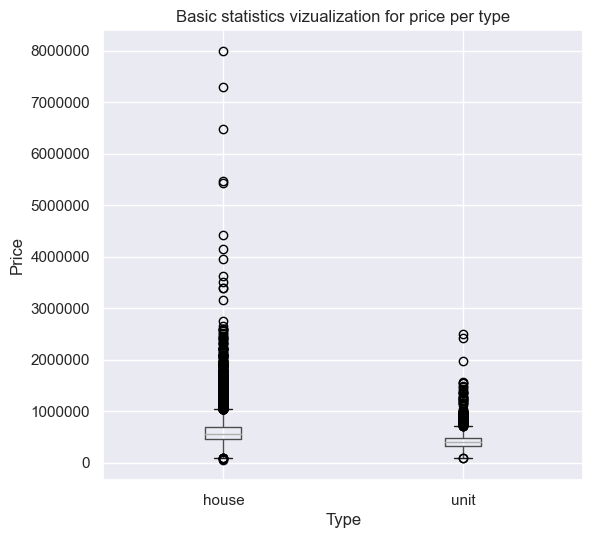

In [203]:
price_outliers_per_type(df)

We can also see that the average price of houses is consistently above the price of units yearwise.

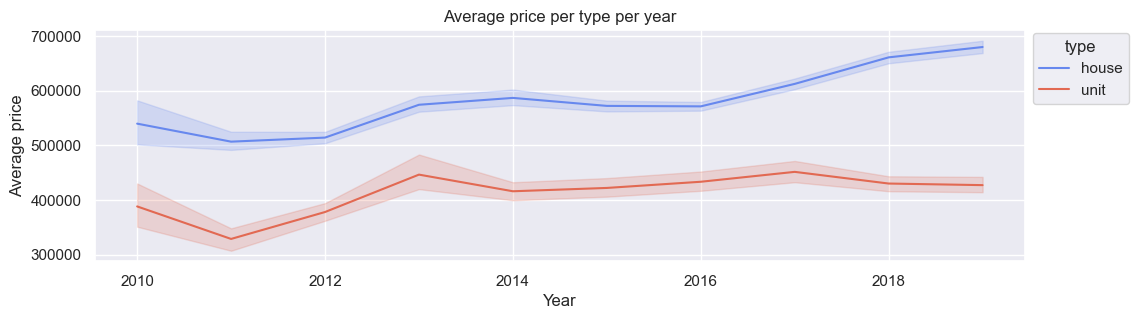

In [204]:
price_per_type_per_year(df)

### 2-C 
> What is/are the most common number of bedrooms for the properties in the data? 

From the bedroom distribution, we can see that the number of rooms with the most counts are *3* and *4*. However, this information is barely informative, as the dataset is severely imbalanced: for this reason, it is more convenient to have a look at the room distribution for the property type.

From this analysis, we can see that:

* *houses*: the most common numbers of bedrooms are **3** (*47%*) and **4** (*42%*), which combined represent almost *90%* of the samples
* *units*: the most common number of bedrooms is **2**, representing over half of the samples (*56%*); the next closest number is **1**, which takes around half the count of the units with two bedrooms (*29%*)

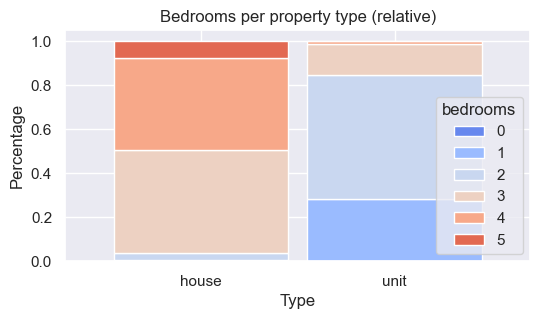

In [270]:
rel_bedrooms_per_type(df, print_table=False)

### 2-D
> How do the property prices look over time, per number of bedrooms and type of properties? Describe the tendency if you can observe one.

The first thing we can see is that the mean of property prices tends to increase, despite some episodical but minimal drops (like in 2011 and 2015); in particular, after 2016 the growth is getting steeper.


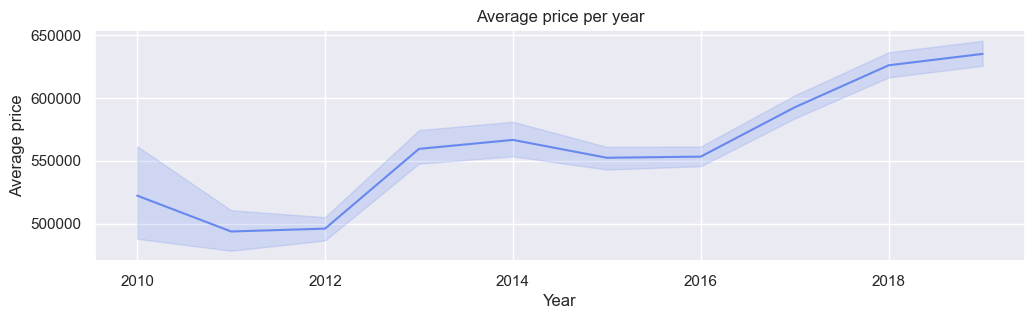

In [206]:
price_per_year(df)

Keeping in mind the imbalance of the dataset, we can also obtain interesting insights if we take a look at how the average price moves over the years per property type. In particular, we can see that the aforementioned trend is primarily due to the trend of `house` properties, especially the steep growth after 2016 where the mean increases from a little over 550,000 to almost 700,000. Conversely, this is not true for the `unit` property type: while they also show an initial drop in 2011 with subsequent growth, after 2014 the mean price stays stable and does not show any tendency to increase.

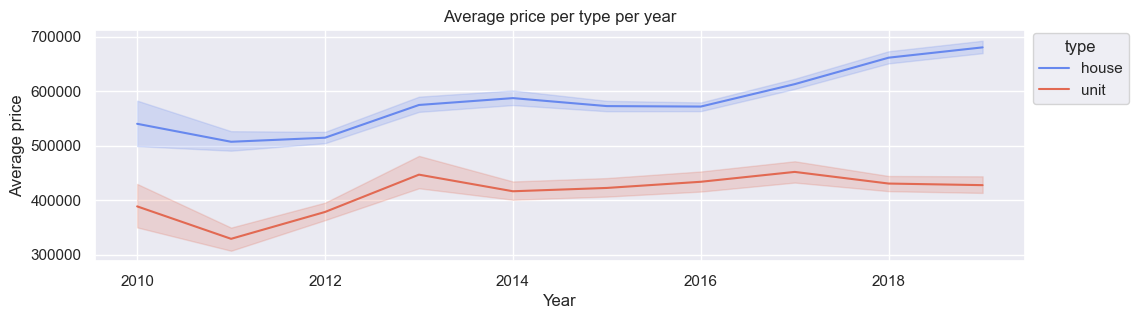

In [207]:
price_per_type_per_year(df)

For what concerns the number of bedrooms, one of the strongest tendencies we can observe is that larger prices are generally associated with more bedrooms. Indeed, we can see that the large majority of the properties over the third price bin have at least 3 bedrooms, most likely 4 or 5.

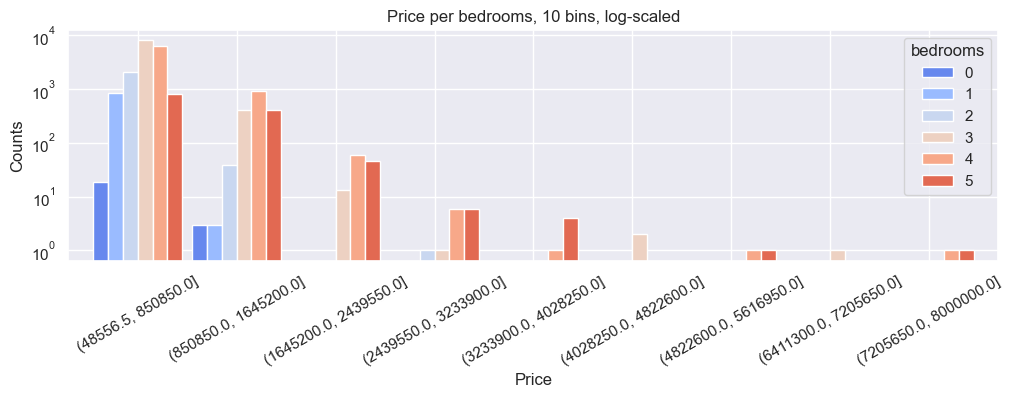

In [208]:
price_per_bedrooms(df)

Also, we can see the mean price of the number of bedrooms over the years shows a increasing tendency except for properties with 1 bedroom, which has decreased in the last couple of years.

It is worth noting that properties with 0 bedrooms appear to have a very pronounced growth, reaching an average price similar with the price of properties with 4 bedrooms, which is a rather puzzling behaviour. We will discuss further on the matter when we will analyse the correlation of price and number of bedrooms in [Answer 2-G](#2-g).

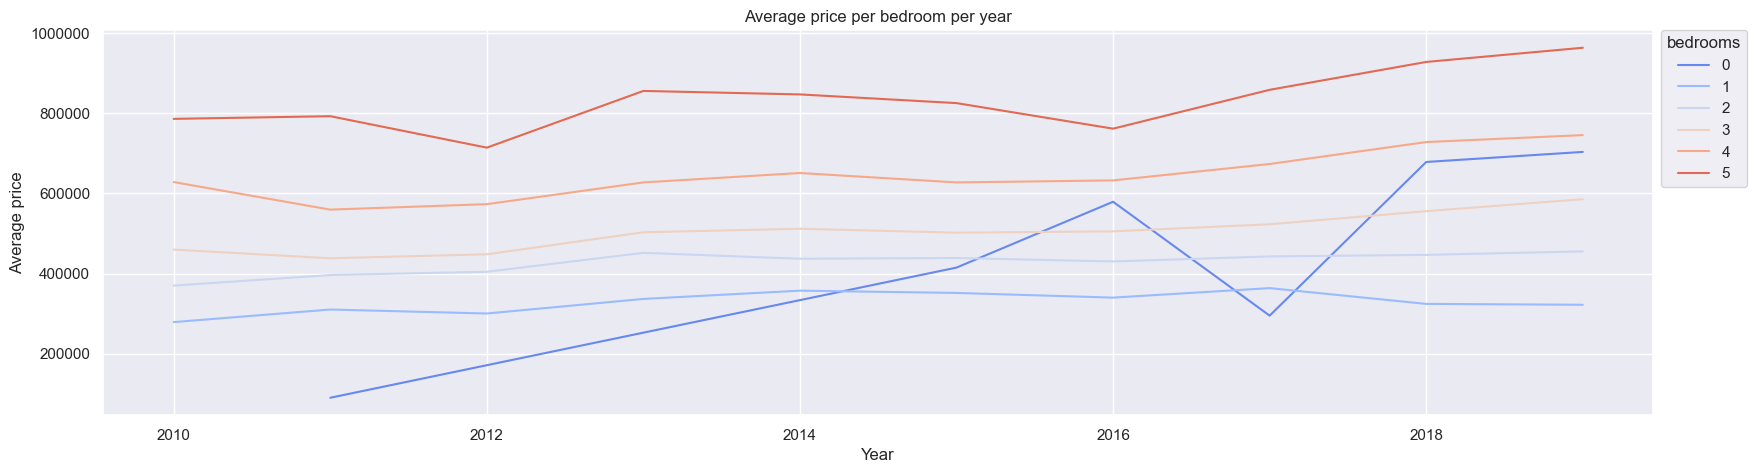

In [209]:
price_per_bedrooms_per_years(df)

### 2-E
> Are there outliers in the distribution of property prices per year? 

Yes, we do find outliers in the distribution of property prices. This can be inferred from the histogram of price distribution itself, as the majority of the counts are concentrated to the left, suggesting a positive asymmetry in the distribution, which is indeed confirmed by the skew value of *5.6*.

The **following boxplot** shows the per-year outliers we have in the data distribution.


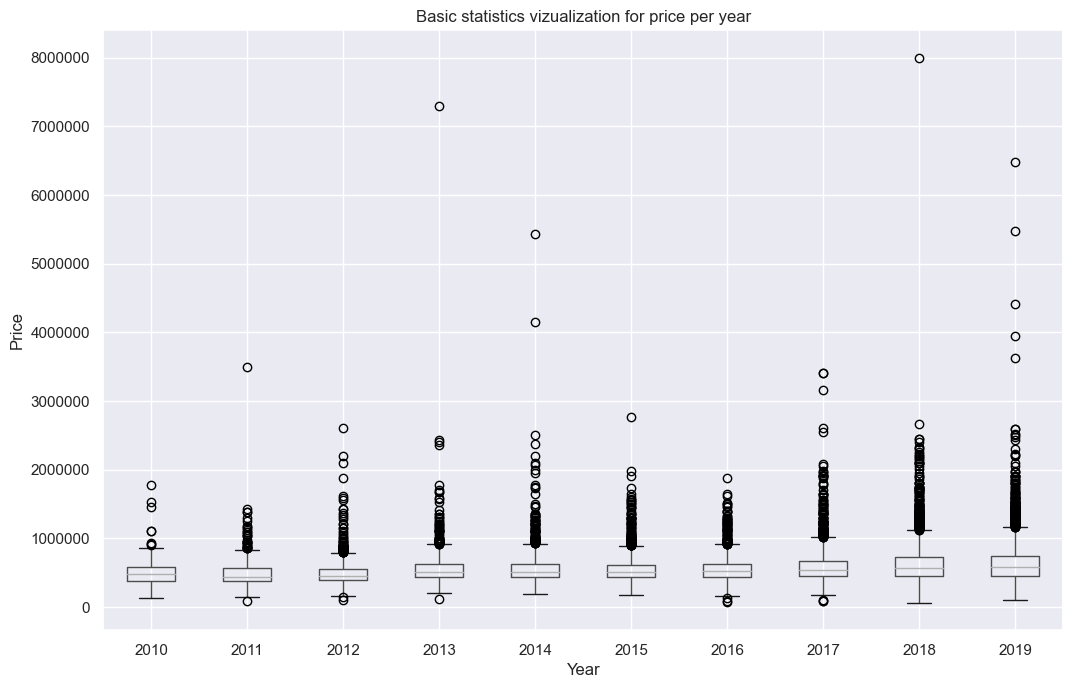

In [210]:
price_outliers_per_year(df)

> Mention methods to correct outliers that can be applied to this dataset.

Here we briefly present some viable methods for dealing with outliers, together with a brief discussion on why they can work on this dataset and/or why they can be not much appropriate.
* **Trimming**. The outliers we are considering are the overly expensive properties, so they do not reflect nor provide information on general trends in price distribution; then, since we are tasked to predict the trends of prices, we can consider simply discarding these values, i.e. remove them from the dataset (*trimming*)
* **Mean substitution.** Rather than removing the outliers, we can substitute their price value with the *mean* of the price, to keep the statistics unchanged
* **Capping**. Otherwise, if we want to keep the count information but we do not want the model to get biased by extremely large property values, we can *round* (*cap*) the outliers to some values. For instance, we could round them to the value of the 75% percentile
* **Binning**. We could consider performing *height discretization* on the price value, to bin all the very expensive properties over one category. This allows us to preserve the information that some of the sold properties were very expensive. On the other hand, this transforms our tasks from a regression task to a multiclass classification task, so it requires us to change the model architecture
* **Standardization.** We could consider performing standardization techniques, in particular, *Z-Score* standardization: this allows us to keep all the outliers in an acceptable range and still retain the regression setting of the original problem

### 2-F
> Are there differences in the distribution of property prices per month of the year? 

Indeed, we can see that the average price of sold properties is at its minimum during the first months of the year, especially in January. Then, it grows during the spring and stays consistent until the Summer season, where we have a local minimum from June to September, and reach its maximum in the Fall, especially during November.


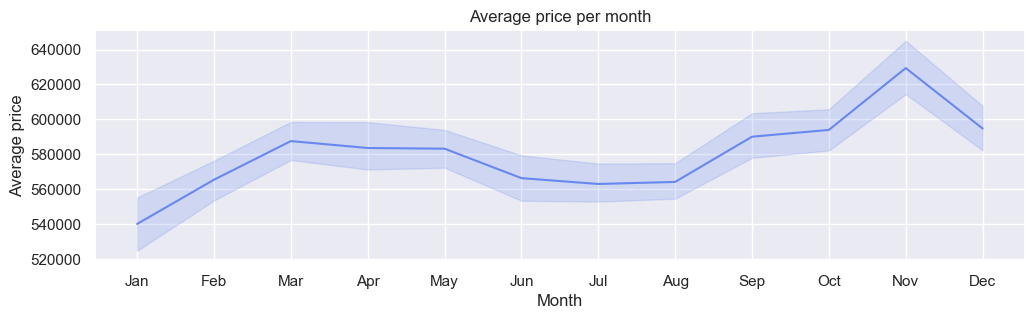

In [211]:
price_per_month(df)

However, it is essential to keep in mind that the plot above does not differentiate between houses and units; since the dataset is severely imbalanced, the trend it suggests is mainly traced by the average price of houses, as they represent most of the dataset. If we consider the average price of units per month, the trends of November being the month with the largest average price and August being the one with the smallest average price are appearently confirmed, but all the others show less consistency. 

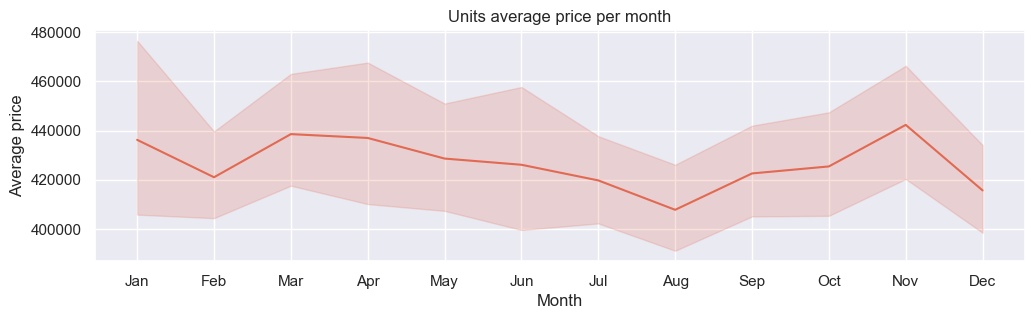

In [265]:
price_per_month_units(df)

The lack of consistency of the average price of units over the years is particularly evident if we take a look at the following plot of the average price per month per year.

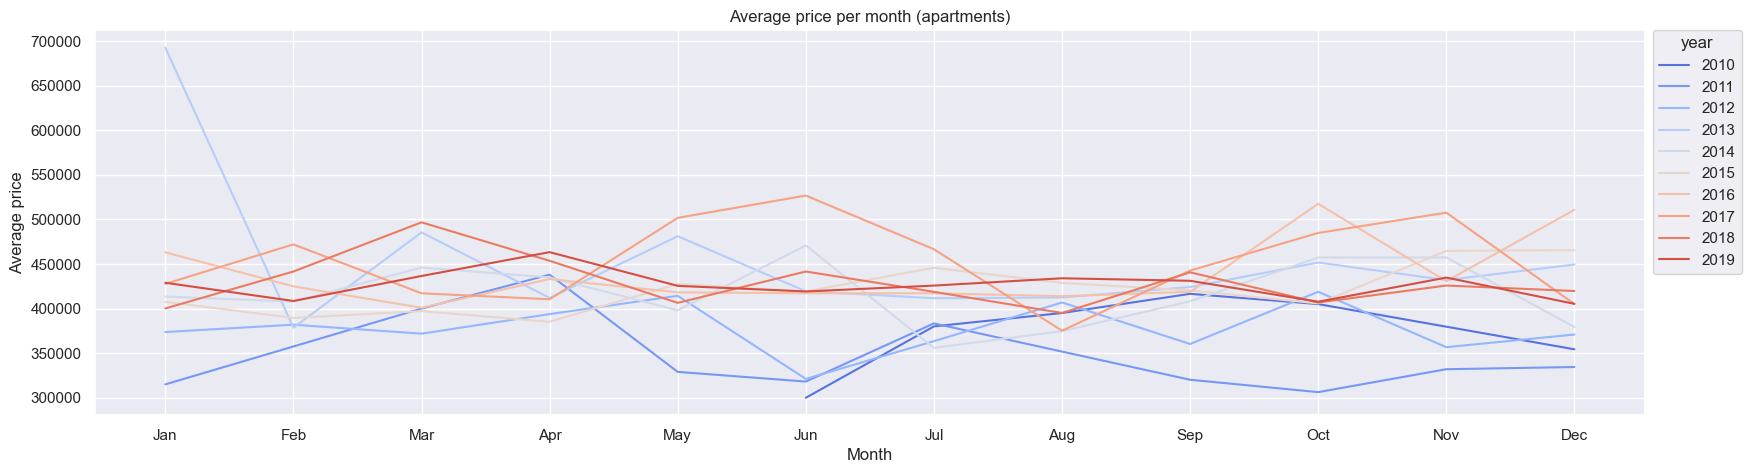

In [212]:
price_per_month_per_year_unit(df)

### 2-G
> Which variables are highly correlated with property prices, and which are weakly correlated?

Since we are correlating *continous* data (`price`) with *ordinal* data (`bedrooms` and the date columns), we will be using *Spearman's* correlation method. 


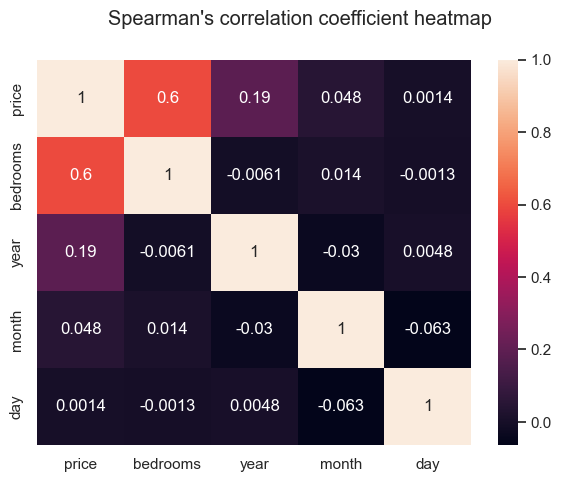

In [213]:
# Correlation matrix
heatmap(df)

From the *Spearman's* correlation matrix, we can see the variable with a higher correlation rank with `price` is `bedrooms` (**0.60**), confirming the insights provided by the analysis of the distribution of prices per number of bedrooms. 

For what concerns `month` and `day`, we can easily say that they are not correlated at all, as they both rank less than 0.05. However, it is worth noting that the rank of `year` is **0.19**, qualifying it as a weak correlation (which also validates the price tendency to grow).

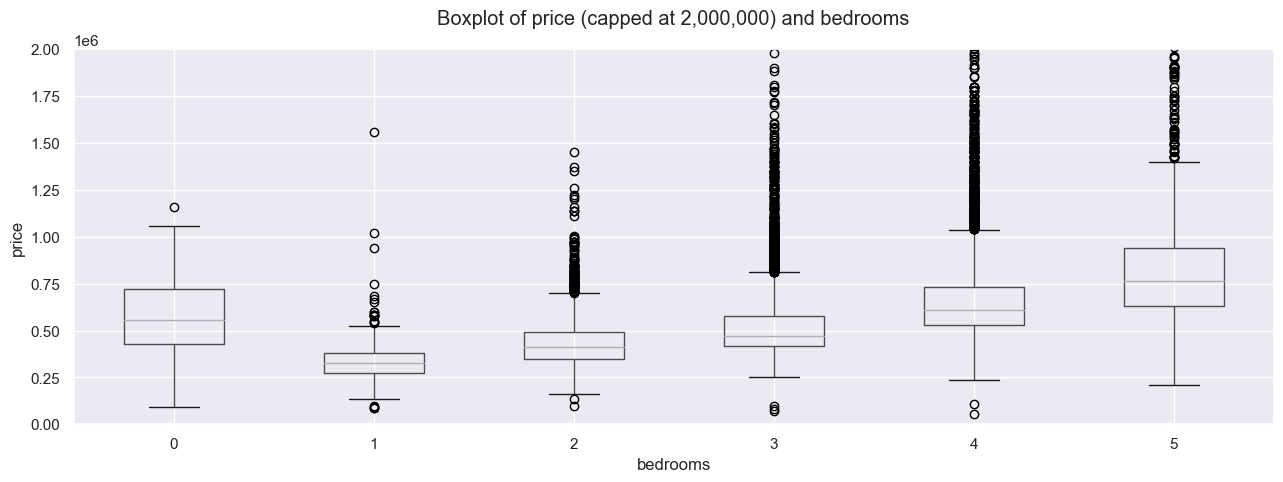

In [214]:
scatter_price(df)

Appearently, properties with 0 bedrooms are exception to this conclusion, but this can easily be explained by two reasons:
1. properties with 0 bedrooms are not conventional houses or apartments: they are studios, studio apartments, or other types of structures with different target buyers than regular properties, therefore they fall under different marketshare and price ranges
2. as we have very few samples of 0 bedrooms properties (just *22*), it is likely the case that our sample is not representative of the real distribution

Since we do not have any outisde knowledge on the dataset, we cannot say for sure which one is it; it may be either the first or the second, or a combination of both.